# [Import]

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder # 결측치가 있으면 에러가 난다...(If there is a missing value, there will be an error)
from scipy.stats import boxcox
from scipy.special import boxcox1p
import matplotlib.pyplot as plt
import scipy.stats as stats
plt.rcParams['axes.unicode_minus'] = False

# [Data read]

In [19]:
data = pd.read_csv('summary_chl_no.csv',encoding="UTF-8-sig")
df = pd.DataFrame(data)
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


Temp             pH             EC             Do  \
count  441039.000000  441039.000000  441039.000000  441039.000000   
mean       15.916571       7.701606     259.924324       9.978915   
std         8.038360       0.614969     202.096413       2.443284   
min         0.000000       5.400000      48.000000       0.500000   
25%         8.700000       7.300000     141.000000       8.300000   
50%        16.100000       7.600000     237.000000       9.900000   
75%        22.900000       8.100000     308.000000      11.600000   
max        35.600000      10.400000    3019.000000      29.100000   

                Turb            TOC             TN             TP  
count  441039.000000  441039.000000  441039.000000  441039.000000  
mean        6.137018       2.632900       2.439421       0.025564  
std        13.492158       1.158457       1.306930       0.027087  
min        -0.200000       0.400000       0.101000       0.003000  
25%         1.500000       1.800000       1.476000       0.008000  
50%         3.200000       2.400000       2.282000       0.016000  
75%         6.300000       3.300000       3.215000       0.033000  
max       897.200000      21.000000      10.532000       0.667000

In [20]:
df['EC'] = df['EC'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


# [Missing value]

In [21]:
df[df==0].count().sum() 

414

In [22]:
df.isnull().sum()

Location    0
Temp        0
pH          0
EC          0
Do          0
Turb        0
TOC         0
TN          0
TP          0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


In [24]:
df = df.dropna(axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441039 entries, 0 to 441038
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Location  441039 non-null  object 
 1   Temp      441039 non-null  float64
 2   pH        441039 non-null  float64
 3   EC        441039 non-null  float64
 4   Do        441039 non-null  float64
 5   Turb      441039 non-null  float64
 6   TOC       441039 non-null  float64
 7   TN        441039 non-null  float64
 8   TP        441039 non-null  float64
dtypes: float64(8), object(1)
memory usage: 30.3+ MB


<Axes: >

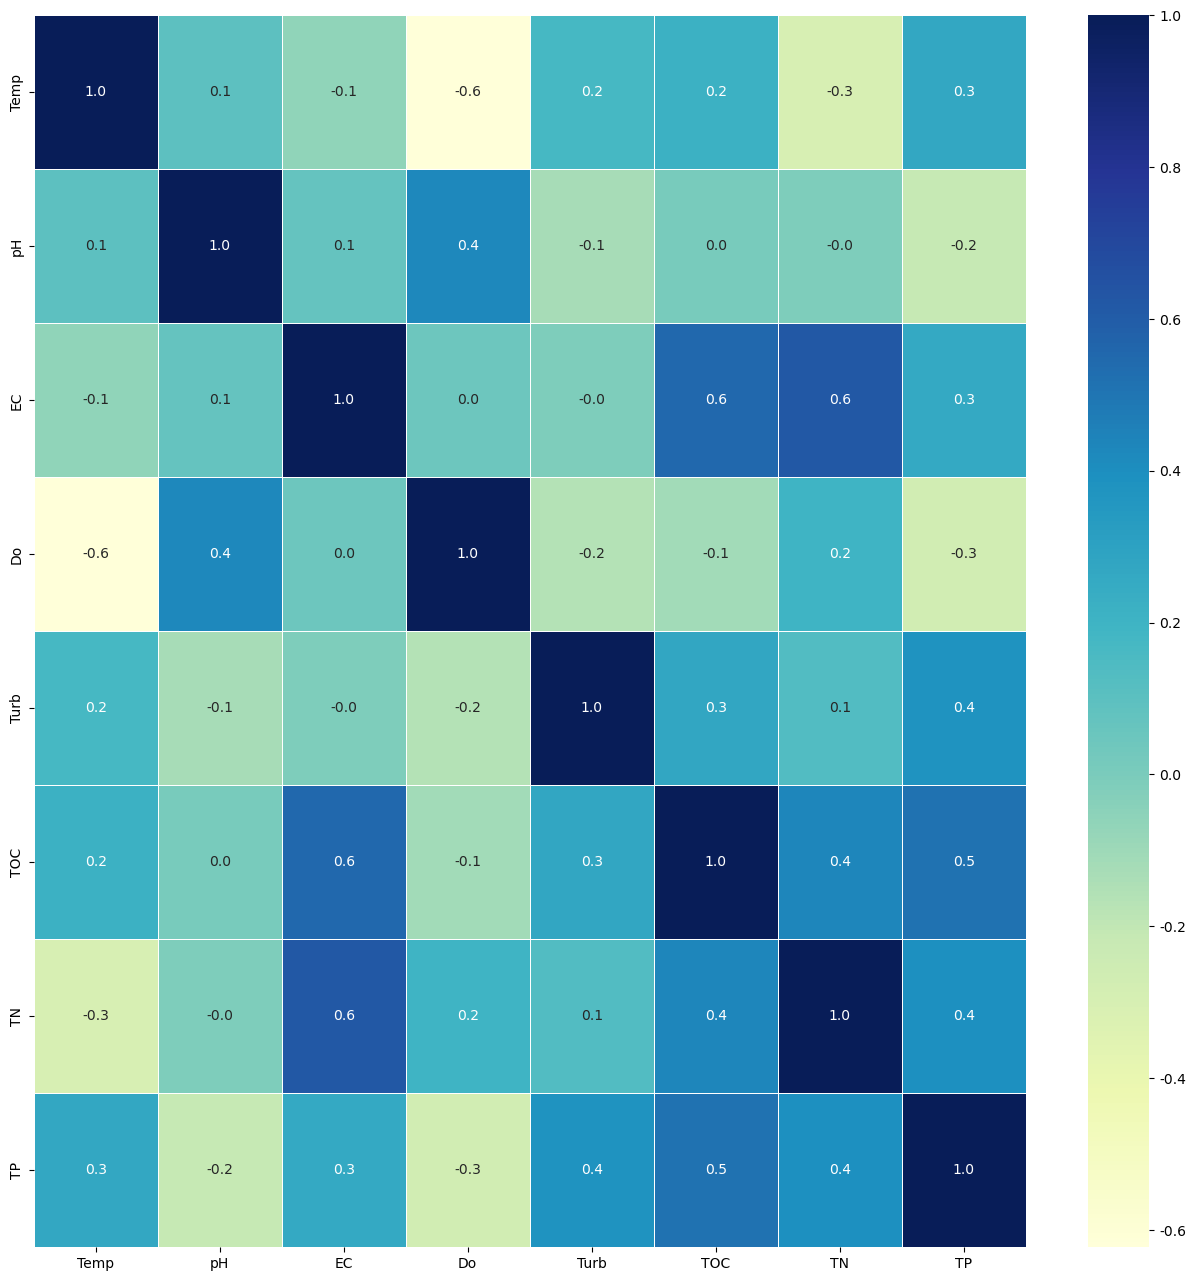

In [25]:
df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거 (axis = 0 remove bank row)

plt.figure(figsize=(16, 16))
corr = df_temp.corr()
sns.heatmap(corr, annot=True, fmt='.1f',  linewidths=0.5, cmap='YlGnBu')

# [Outlier]

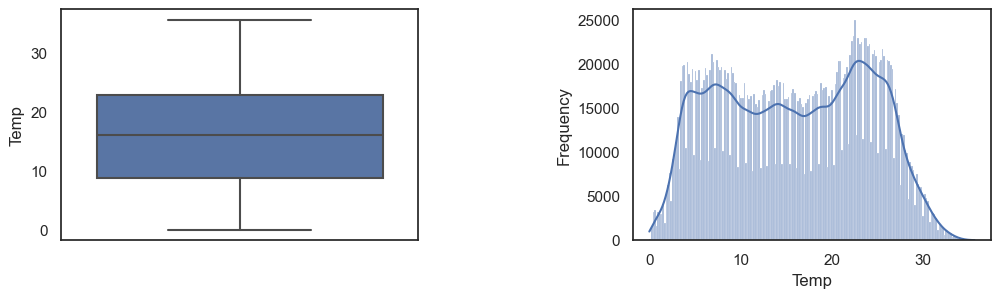

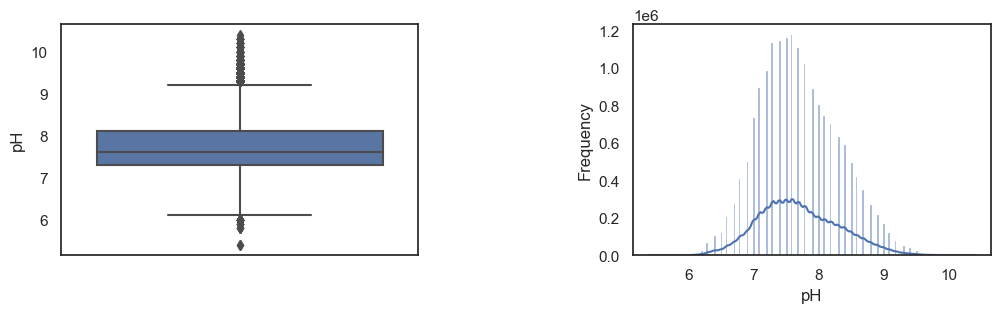

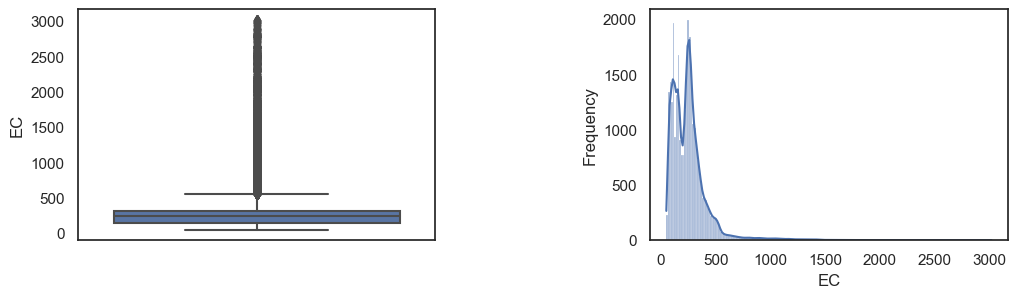

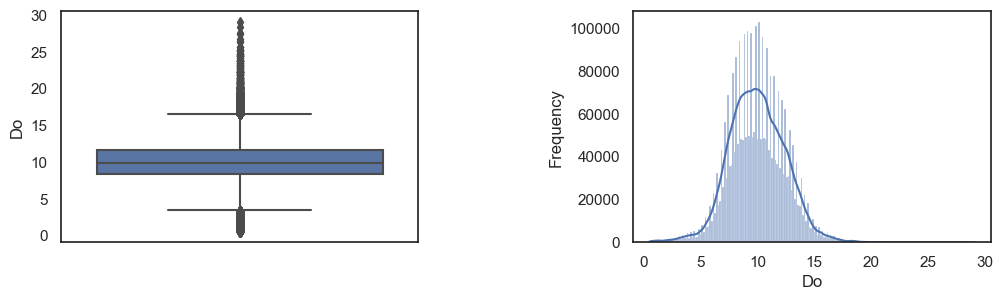

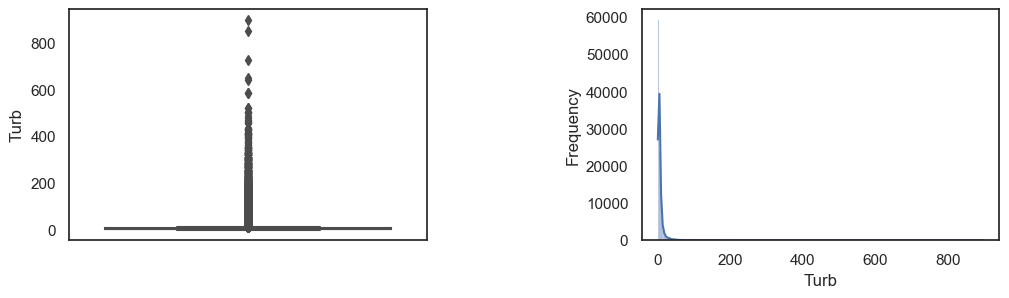

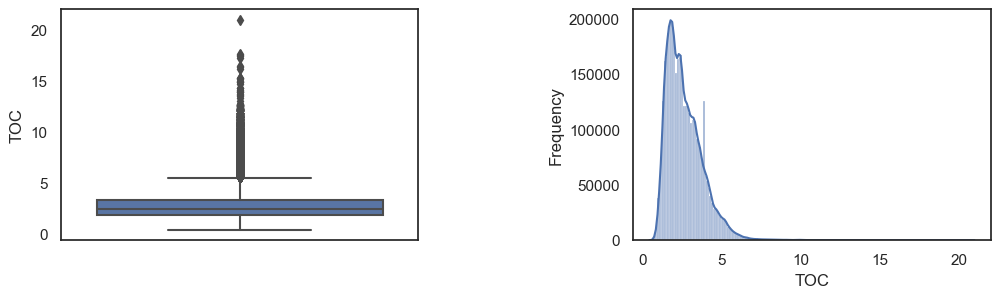

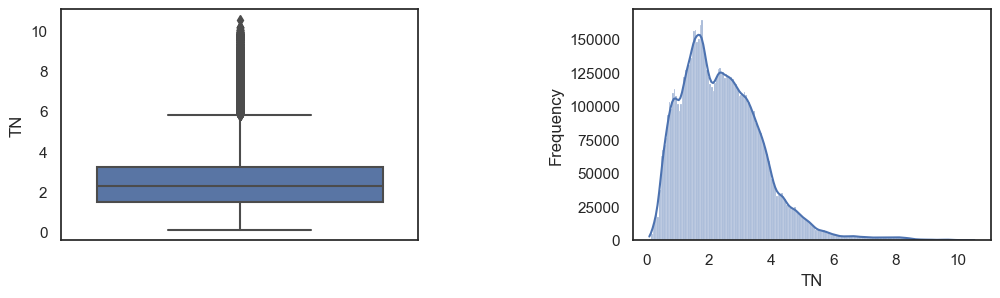

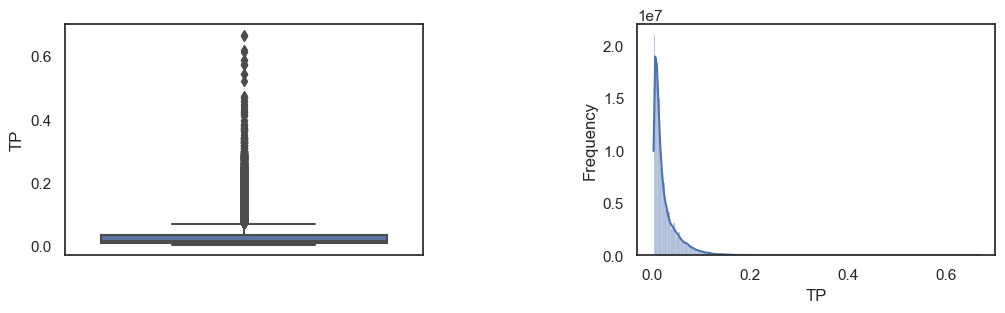

In [26]:
def show_hist_by_target(df, columns):
    sns.set(font_scale=1.0)
    sns.set_style('white')
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
        sns.boxplot(data=df, y=column, ax=axs[0])
        sns.histplot(data=df, x=column, ax=axs[1], kde=True, bins=200, stat='frequency')
        plt.subplots_adjust(hspace=0.8,wspace=0.6)

show_hist_by_target(df_temp, df_temp.columns)

# grid_obj = sns.PairGrid(df_temp)
# grid_obj.map(sns.histplot)

#sns.set(font_scale=2)
#sns.set_style("white")
#sns.displot(df_temp, x=df_temp.iloc[:,0], height=10, aspect=1.6, kde=True, bins=100)
#sns.boxplot(x=df_temp.iloc[:,0], data=df_temp)

In [27]:
q3 = df.quantile(0.75, numeric_only=True) # df['__'].quantile(0.75) 처럼 특정 열만 적용 가능 (Only certain columns can be applied)
q1 = df.quantile(0.25, numeric_only=True)

iqr = q3 - q1

In [28]:
df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df_temp[df_temp < 0].count().sum())
print ("0 > : " , df_temp[df_temp > 0].count().sum())

0 = :  414
0 < :  8
0 > :  3527890


In [29]:
s_range = 3
for k in df.columns:
    if k != 'Location':
        out_df = df[(df[k] > q3[k] + s_range* iqr[k]) | (df[k] < q1[k] - s_range * iqr[k])]
        df = df.drop(out_df.index, axis=0)

df

Location  Temp   pH     EC    Do  Turb  TOC     TN     TP
0            남면  10.2  7.5  541.0   9.8   1.9  4.7  4.822  0.027
1            남면  10.2  7.5  538.0   9.8   1.9  4.6  4.797  0.027
2            남면  10.2  7.5  539.0   9.8   1.9  4.6  4.776  0.027
3            남면  10.1  7.5  540.0   9.7   1.8  4.6  4.753  0.028
4            남면  10.0  7.5  540.0   9.6   1.9  4.7  4.725  0.026
...         ...   ...  ...    ...   ...   ...  ...    ...    ...
441034       흥천   2.3  8.4  363.0  13.7   1.4  1.5  3.548  0.015
441035       흥천   2.3  8.4  364.0  13.6   1.4  1.5  3.636  0.012
441036       흥천   2.3  8.4  364.0  13.7   1.4  1.5  3.665  0.010
441037       흥천   2.2  8.4  366.0  13.7   1.4  1.5  3.651  0.009
441038       흥천   2.3  8.4  367.0  13.6   1.4  1.5  3.720  0.009

[407545 rows x 9 columns]

In [30]:
df = df.reset_index(drop=True)
df

Location  Temp   pH     EC    Do  Turb  TOC     TN     TP
0            남면  10.2  7.5  541.0   9.8   1.9  4.7  4.822  0.027
1            남면  10.2  7.5  538.0   9.8   1.9  4.6  4.797  0.027
2            남면  10.2  7.5  539.0   9.8   1.9  4.6  4.776  0.027
3            남면  10.1  7.5  540.0   9.7   1.8  4.6  4.753  0.028
4            남면  10.0  7.5  540.0   9.6   1.9  4.7  4.725  0.026
...         ...   ...  ...    ...   ...   ...  ...    ...    ...
407540       흥천   2.3  8.4  363.0  13.7   1.4  1.5  3.548  0.015
407541       흥천   2.3  8.4  364.0  13.6   1.4  1.5  3.636  0.012
407542       흥천   2.3  8.4  364.0  13.7   1.4  1.5  3.665  0.010
407543       흥천   2.2  8.4  366.0  13.7   1.4  1.5  3.651  0.009
407544       흥천   2.3  8.4  367.0  13.6   1.4  1.5  3.720  0.009

[407545 rows x 9 columns]

In [31]:
df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df_temp[df_temp < 0].count().sum())
print ("0 > : " , df_temp[df_temp > 0].count().sum())

0 = :  414
0 < :  8
0 > :  3259938


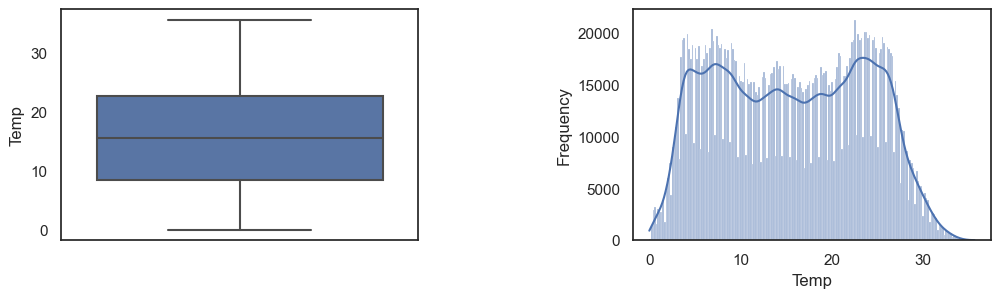

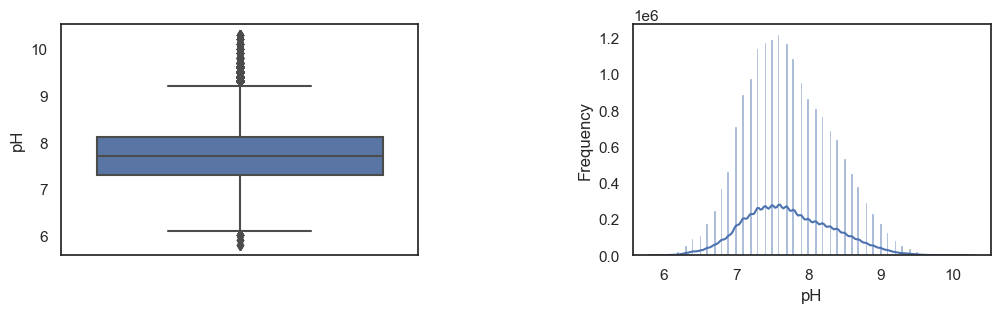

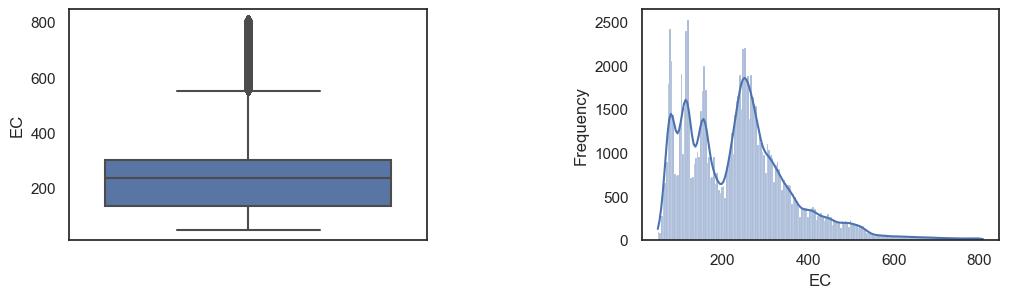

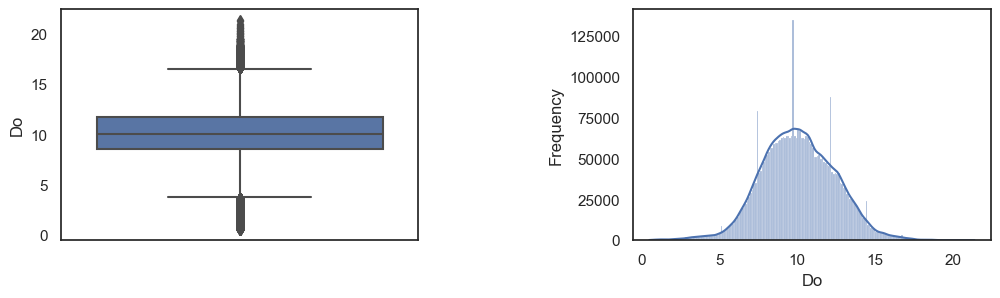

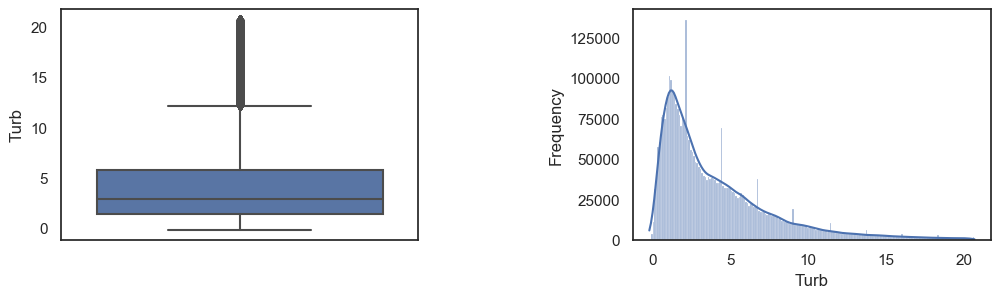

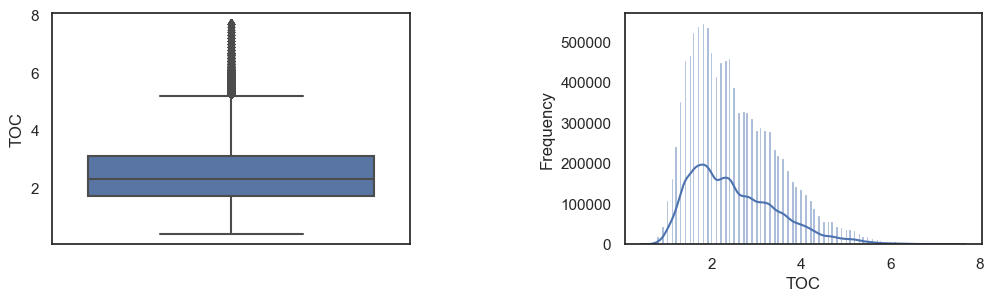

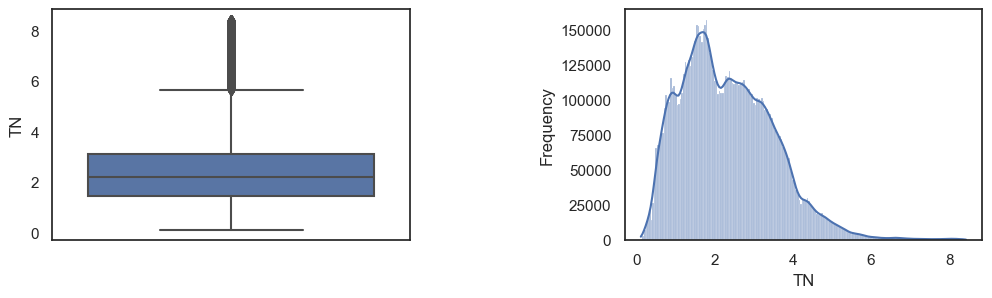

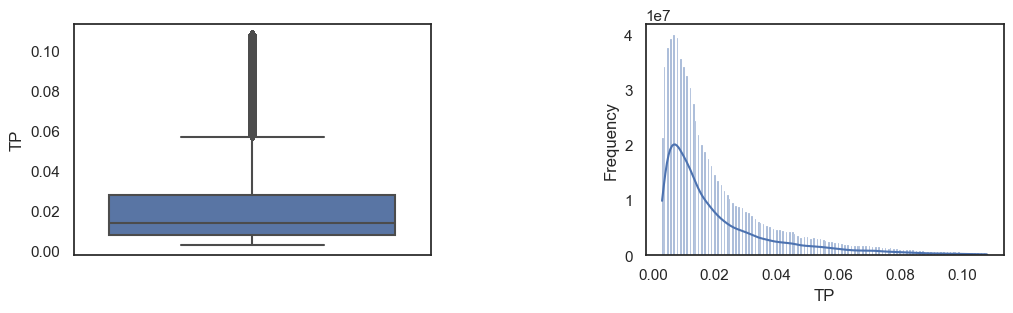

In [32]:
df_temp = df.drop('Location', axis=1) # axis = 0은 행 제거

def show_hist_by_target(df, columns):
    sns.set(font_scale=1.0)
    sns.set_style('white')
    for column in columns:
        fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
        sns.boxplot(data=df, y=column, ax=axs[0])
        sns.histplot(data=df, x=column, ax=axs[1], kde=True, bins=200, stat='frequency')
        plt.subplots_adjust(hspace=0.8,wspace=0.6)

show_hist_by_target(df_temp, df_temp.columns)


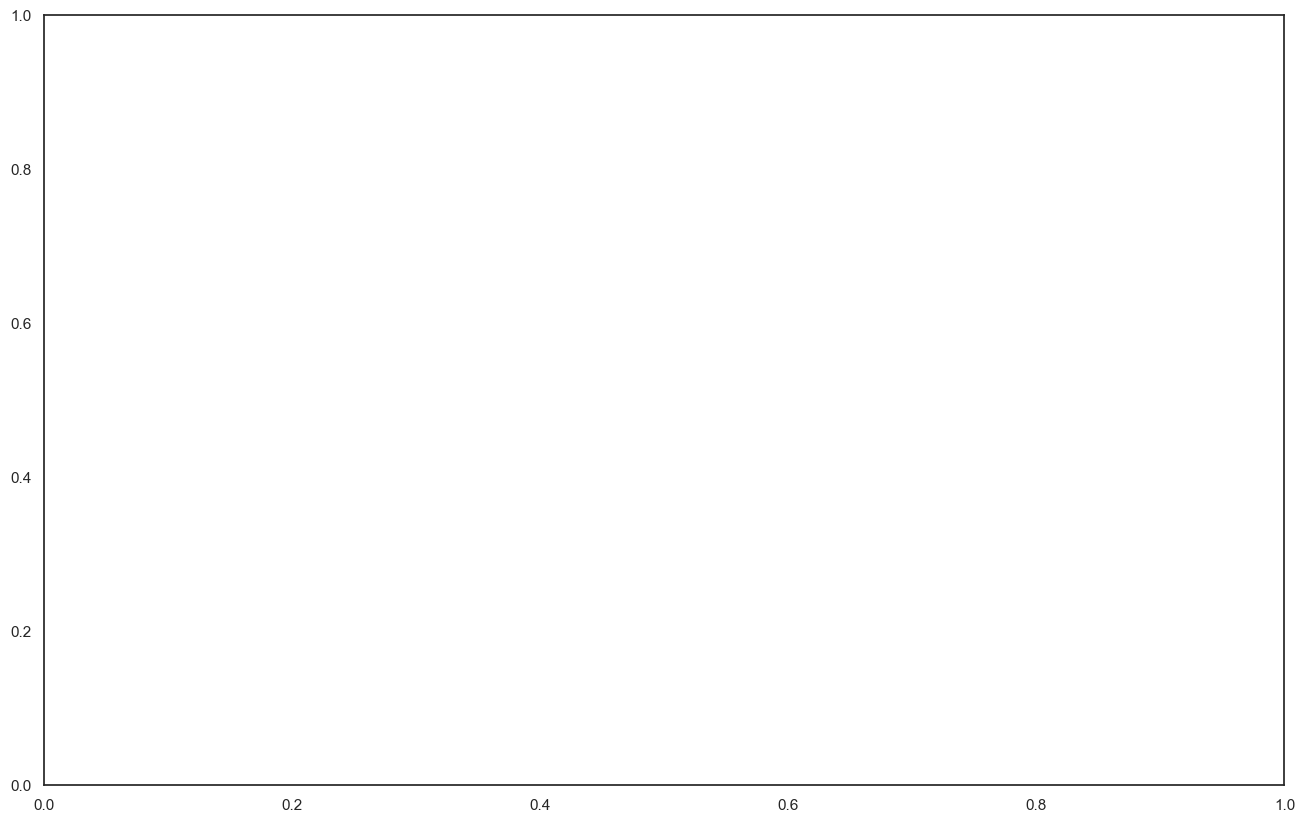

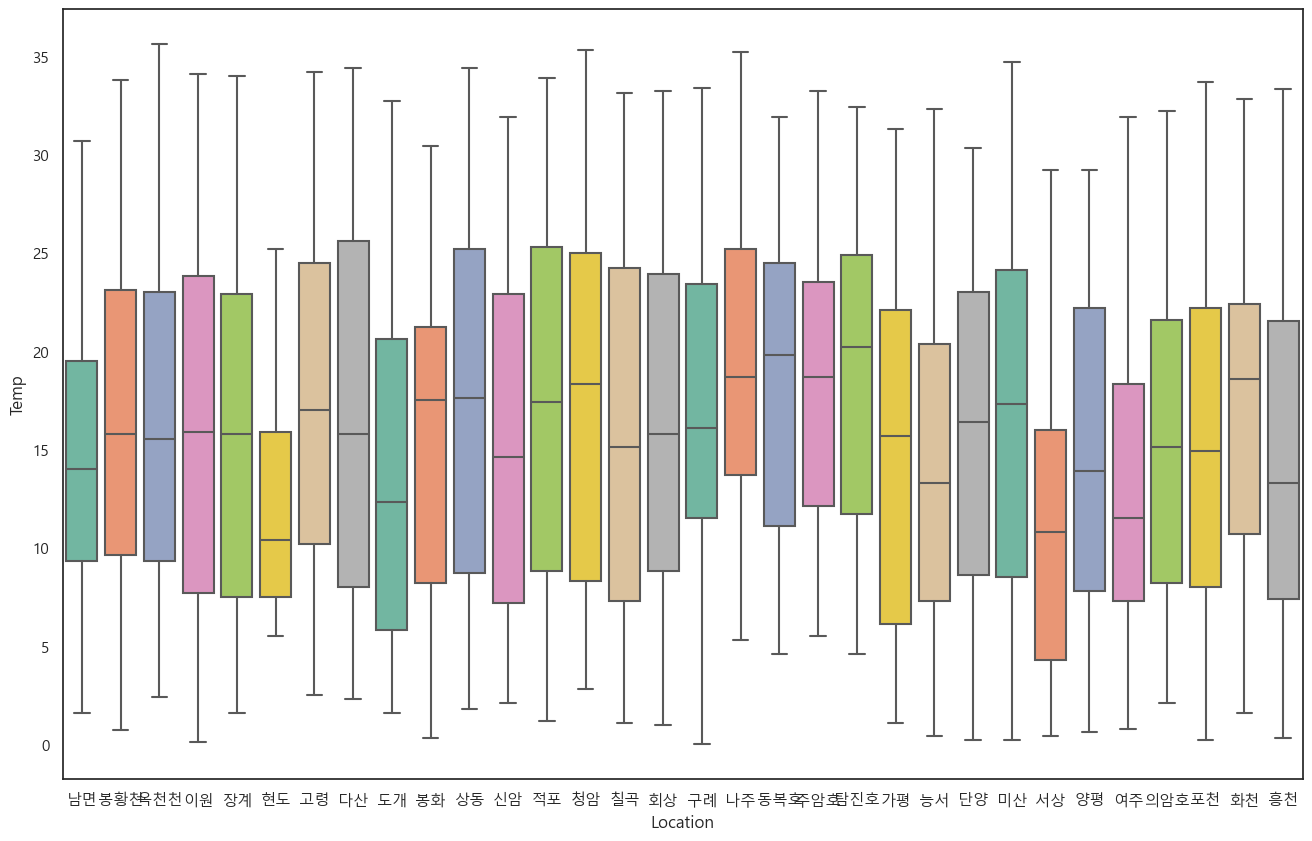

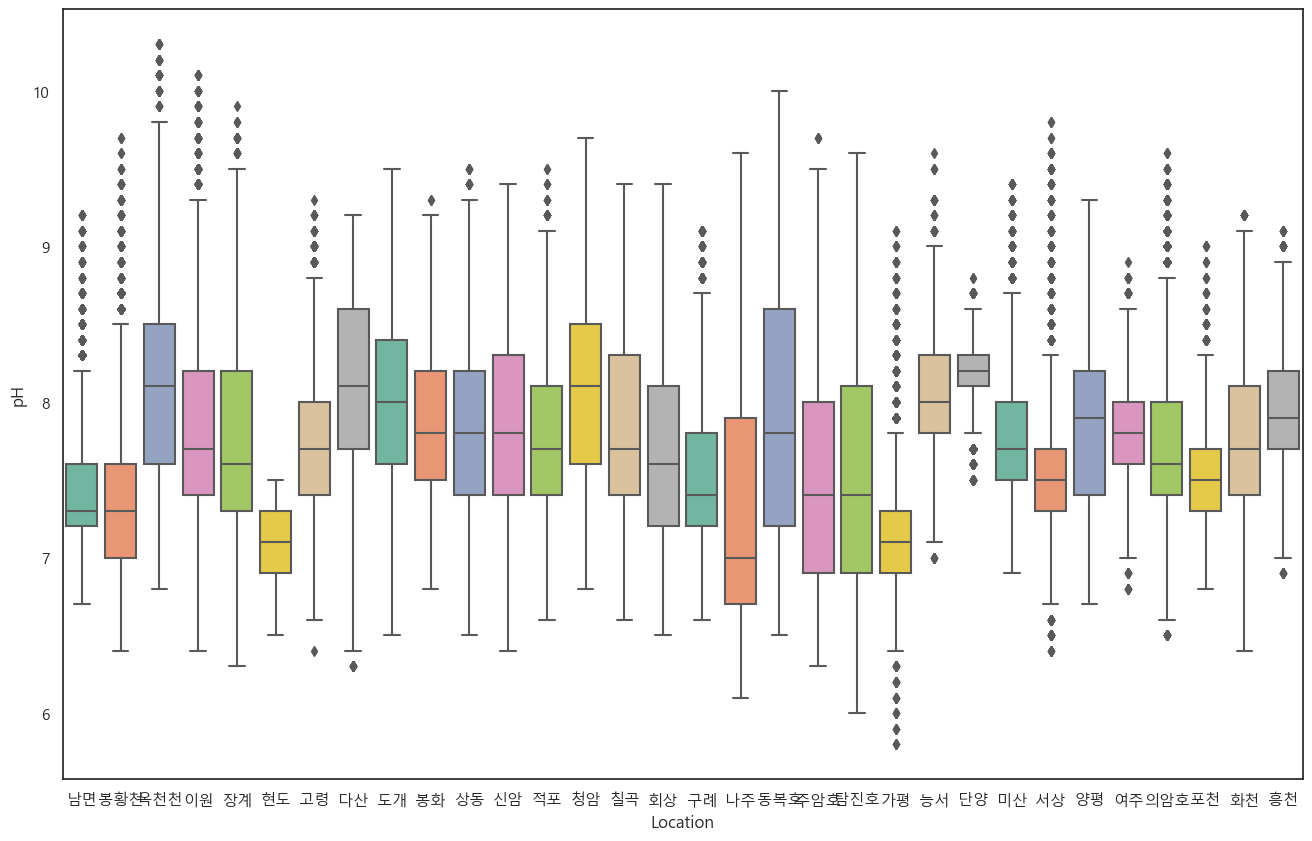

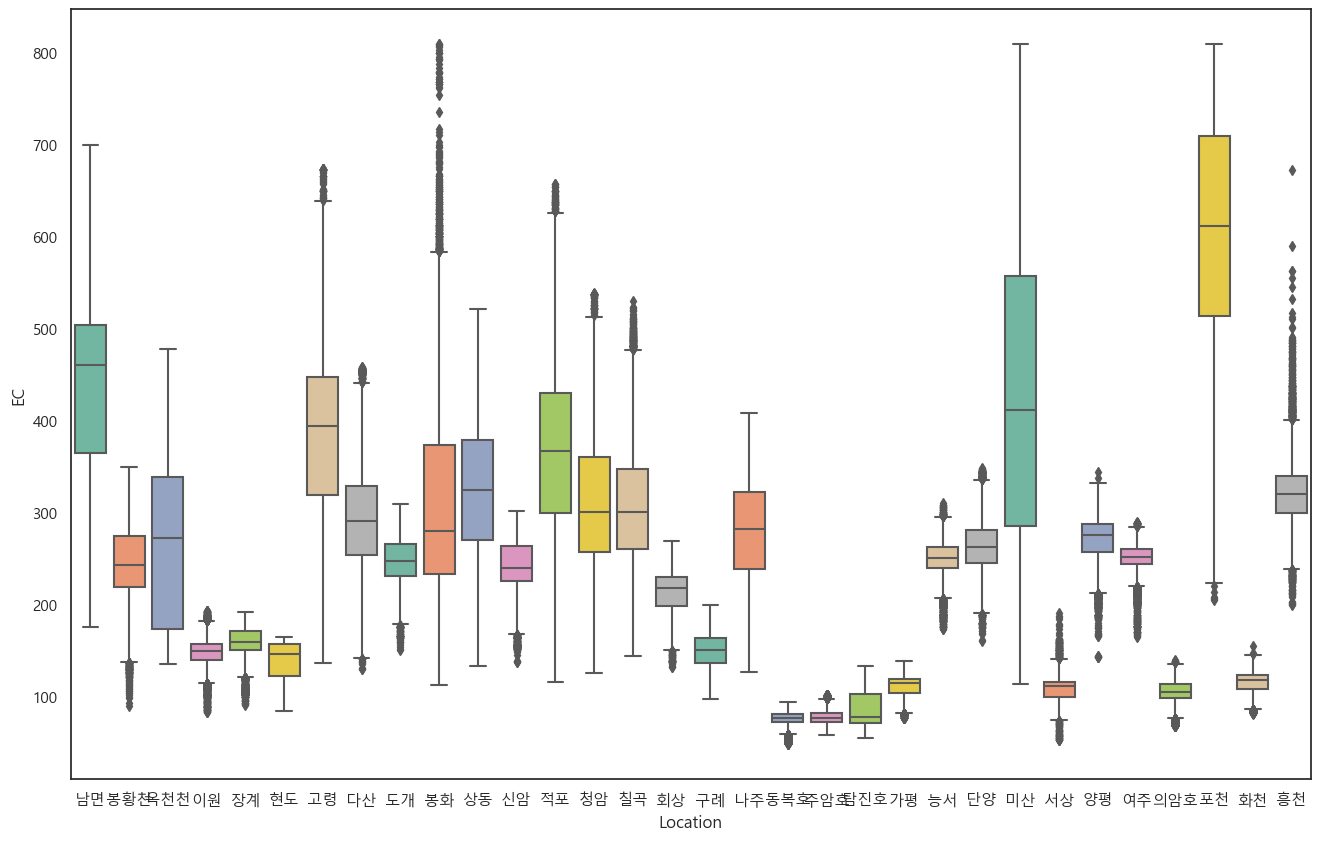

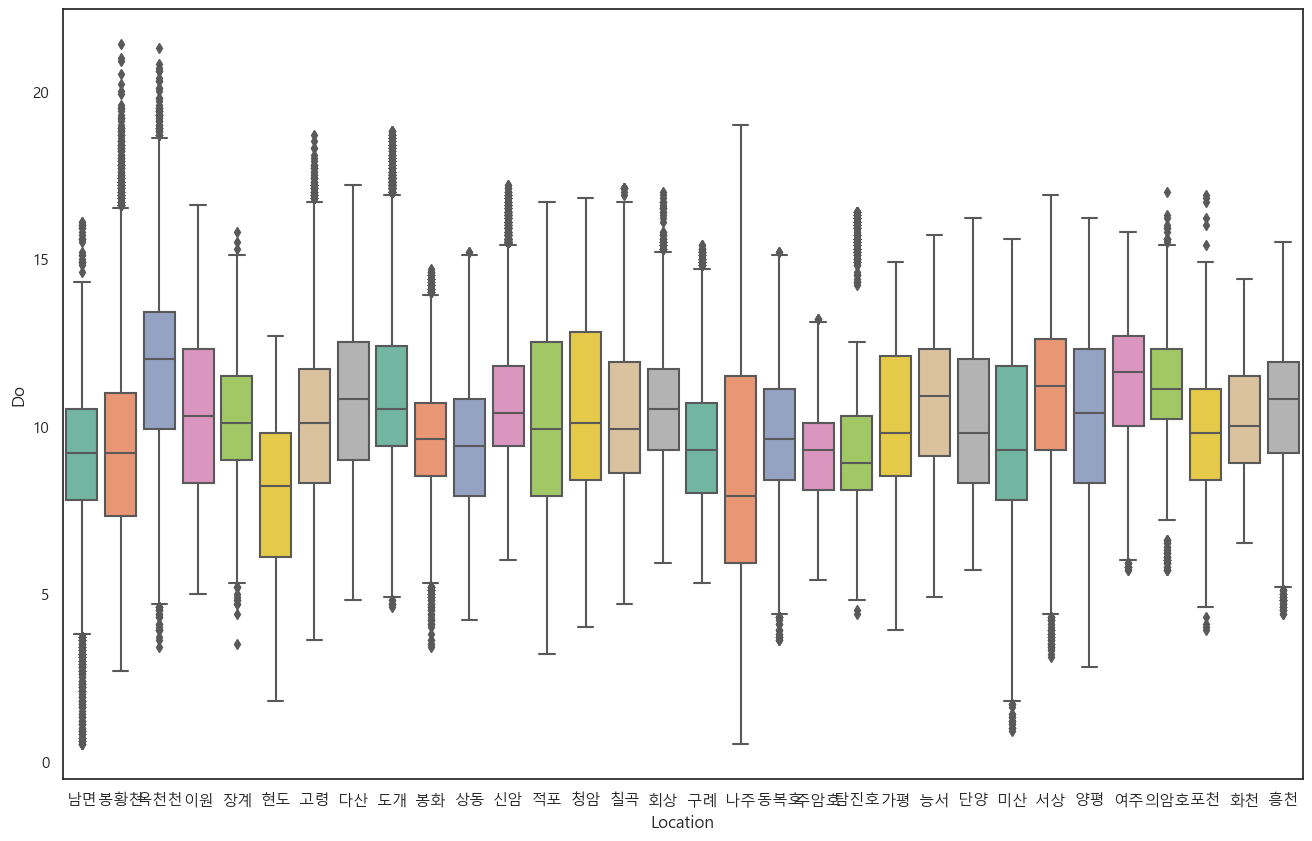

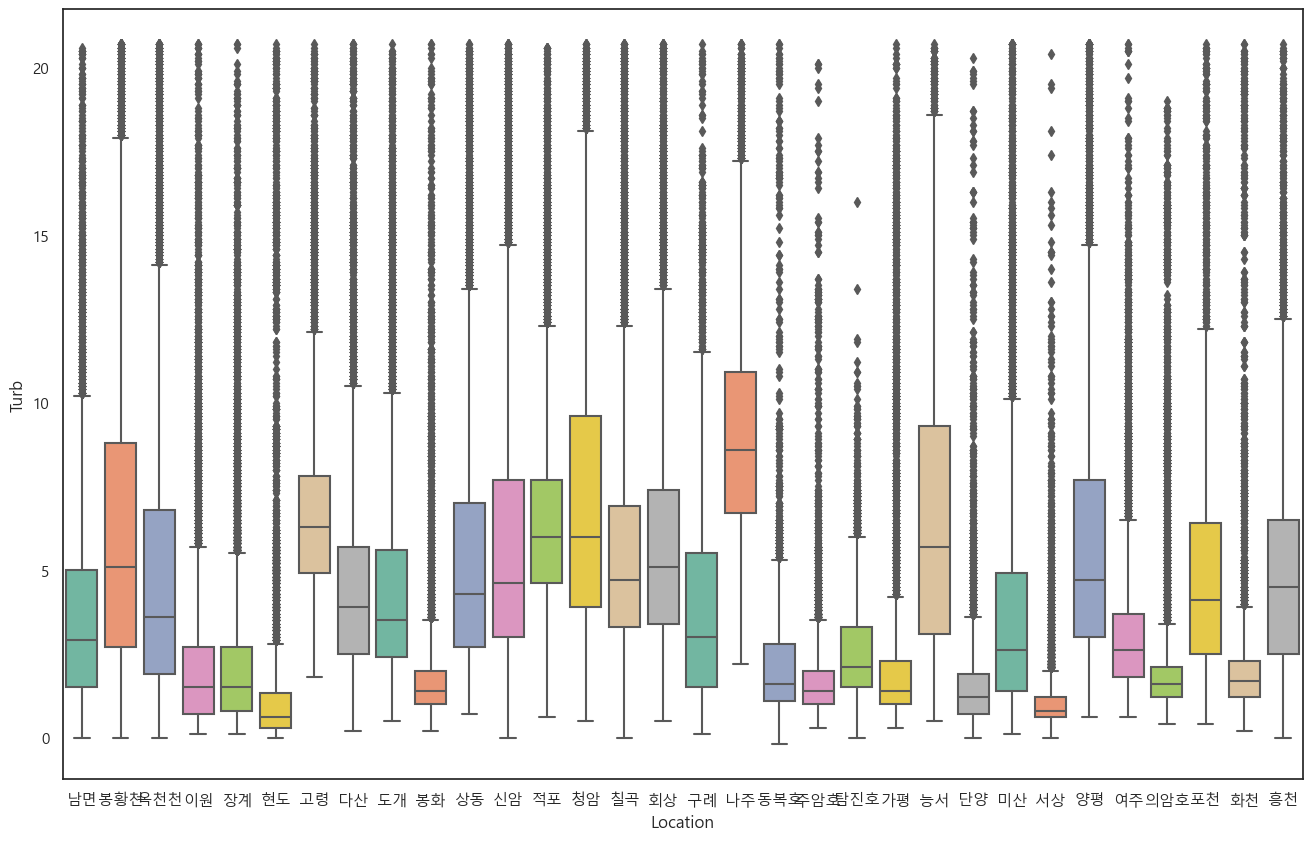

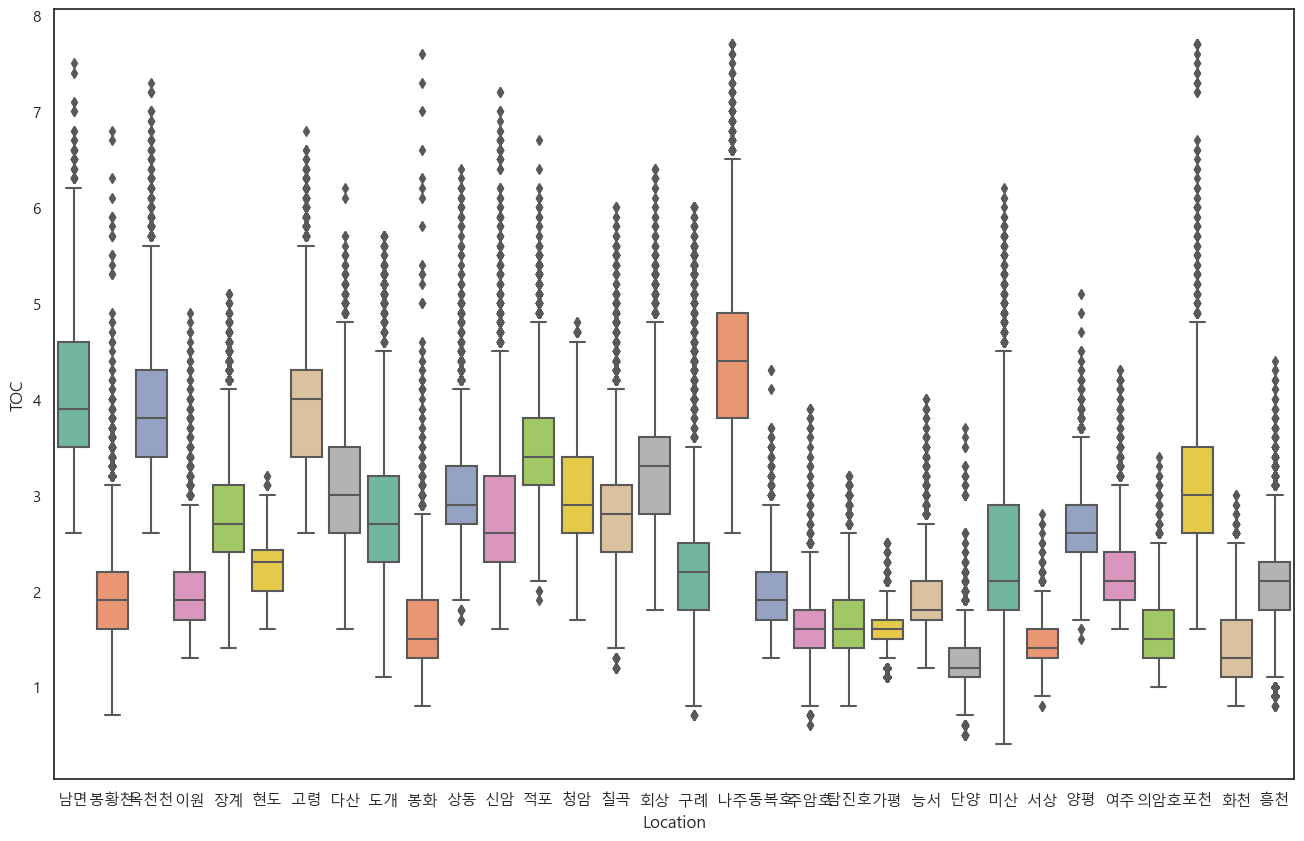

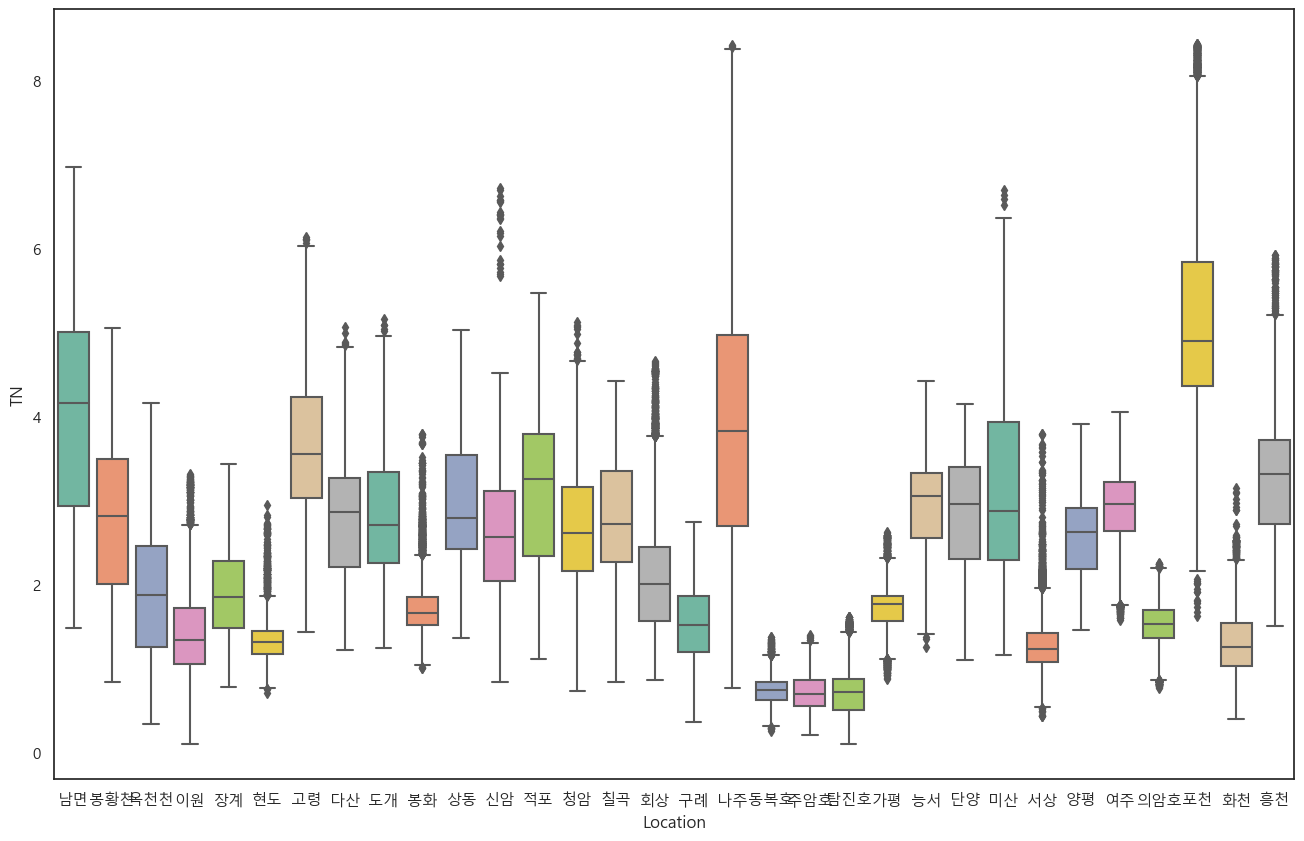

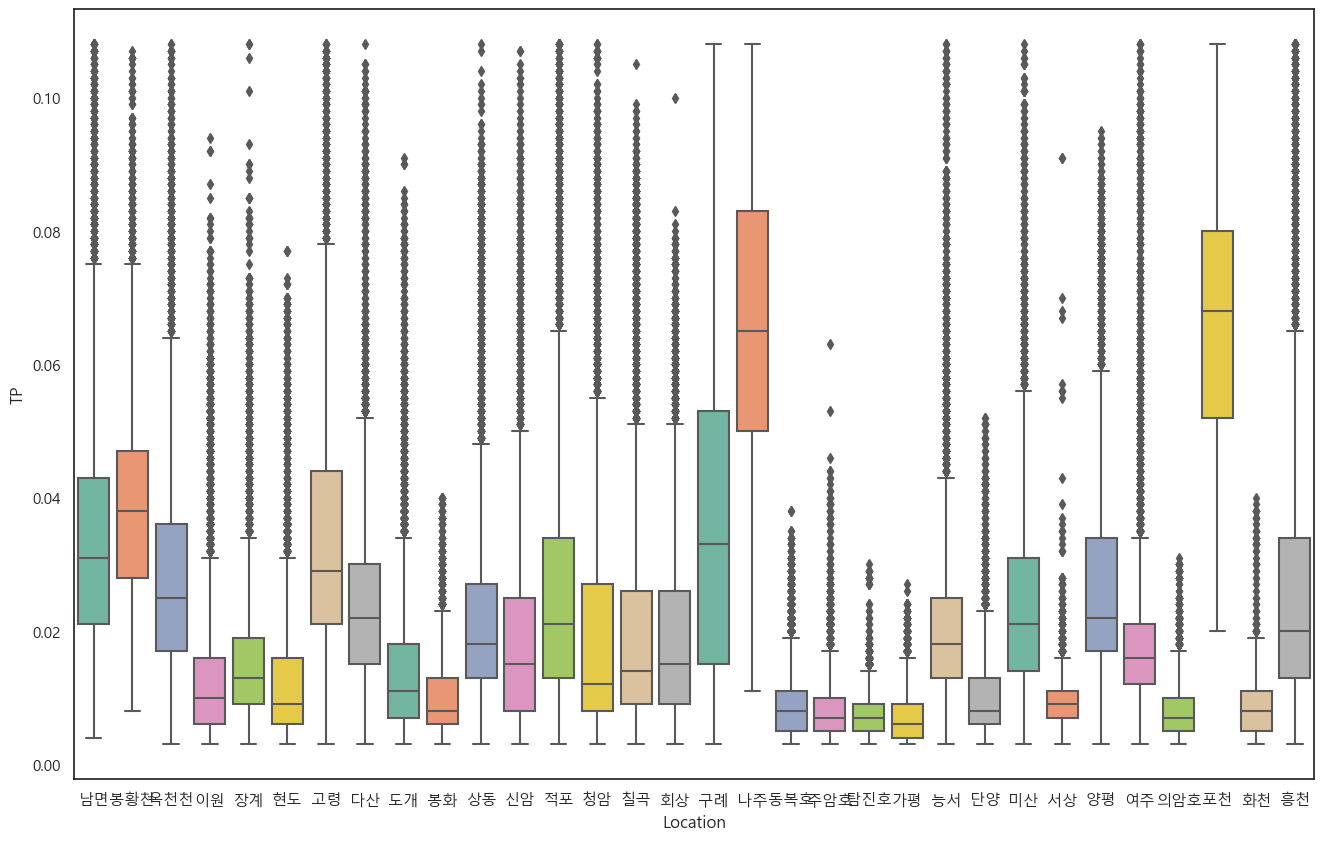

In [33]:
for k in df.columns:
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(16, 10))
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    if k != 'Location':
        sns.boxplot(y=k, x="Location", data=df, palette='Set2')

# Standard / Normalizing

- Standard normalizing : 정규분포를 따르는 경우에 표준화하자(Standardize when following a normal distribution).
- Normalizing : 정규분포는 따르지 않는 경우에 정규화하자 (Normalize when normal distribution is not followed).


In [34]:
df = df.drop('Location', axis=1) # axis = 0은 행 제거

print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df[df < 0].count().sum())
print ("0 > : " , df[df > 0].count().sum())

df

0 = :  414
0 < :  8
0 > :  3259938


Temp   pH     EC    Do  Turb  TOC     TN     TP
0       10.2  7.5  541.0   9.8   1.9  4.7  4.822  0.027
1       10.2  7.5  538.0   9.8   1.9  4.6  4.797  0.027
2       10.2  7.5  539.0   9.8   1.9  4.6  4.776  0.027
3       10.1  7.5  540.0   9.7   1.8  4.6  4.753  0.028
4       10.0  7.5  540.0   9.6   1.9  4.7  4.725  0.026
...      ...  ...    ...   ...   ...  ...    ...    ...
407540   2.3  8.4  363.0  13.7   1.4  1.5  3.548  0.015
407541   2.3  8.4  364.0  13.6   1.4  1.5  3.636  0.012
407542   2.3  8.4  364.0  13.7   1.4  1.5  3.665  0.010
407543   2.2  8.4  366.0  13.7   1.4  1.5  3.651  0.009
407544   2.3  8.4  367.0  13.6   1.4  1.5  3.720  0.009

[407545 rows x 8 columns]

## 정규화 전 ---- 여기서 부터 df 로 통일 (Before normalization ----- from here to df)

In [35]:
df = df.replace(0, 0.00000000001)
df

Temp   pH     EC    Do  Turb  TOC     TN     TP
0       10.2  7.5  541.0   9.8   1.9  4.7  4.822  0.027
1       10.2  7.5  538.0   9.8   1.9  4.6  4.797  0.027
2       10.2  7.5  539.0   9.8   1.9  4.6  4.776  0.027
3       10.1  7.5  540.0   9.7   1.8  4.6  4.753  0.028
4       10.0  7.5  540.0   9.6   1.9  4.7  4.725  0.026
...      ...  ...    ...   ...   ...  ...    ...    ...
407540   2.3  8.4  363.0  13.7   1.4  1.5  3.548  0.015
407541   2.3  8.4  364.0  13.6   1.4  1.5  3.636  0.012
407542   2.3  8.4  364.0  13.7   1.4  1.5  3.665  0.010
407543   2.2  8.4  366.0  13.7   1.4  1.5  3.651  0.009
407544   2.3  8.4  367.0  13.6   1.4  1.5  3.720  0.009

[407545 rows x 8 columns]

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


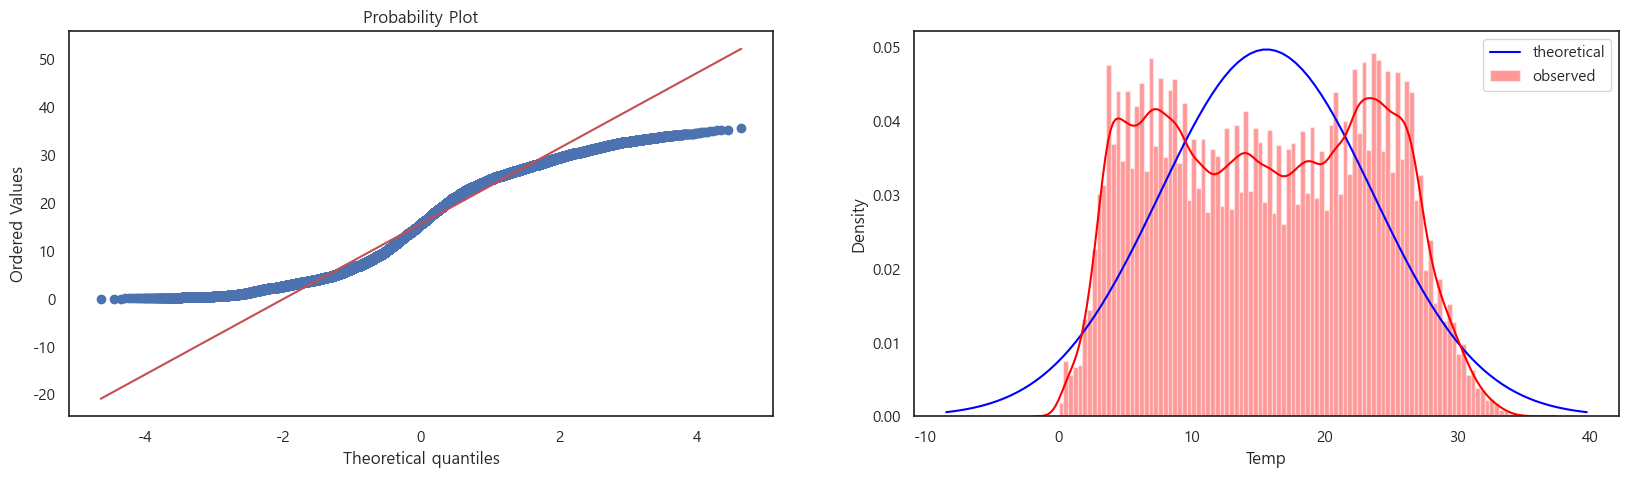

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


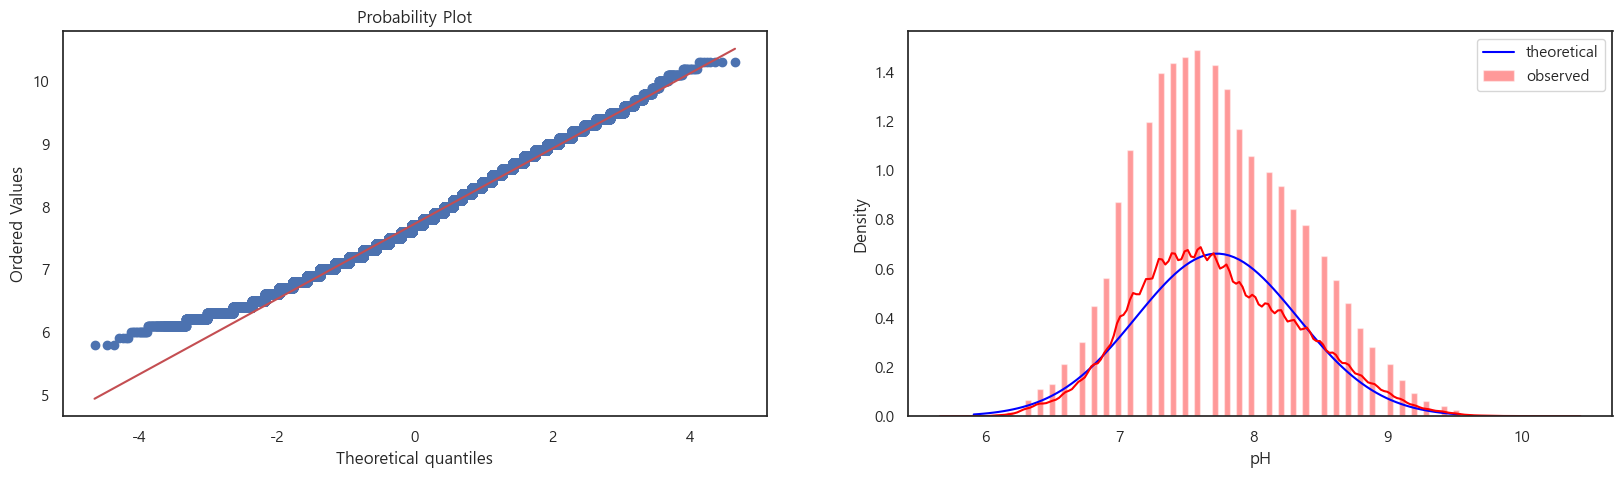

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


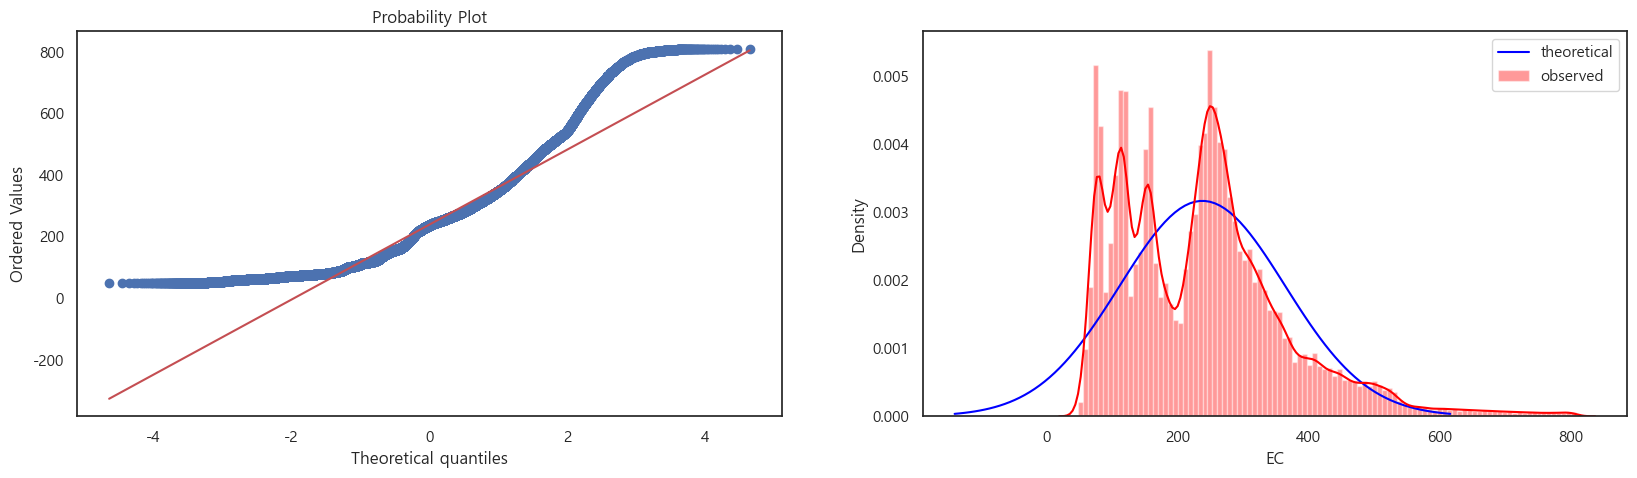

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


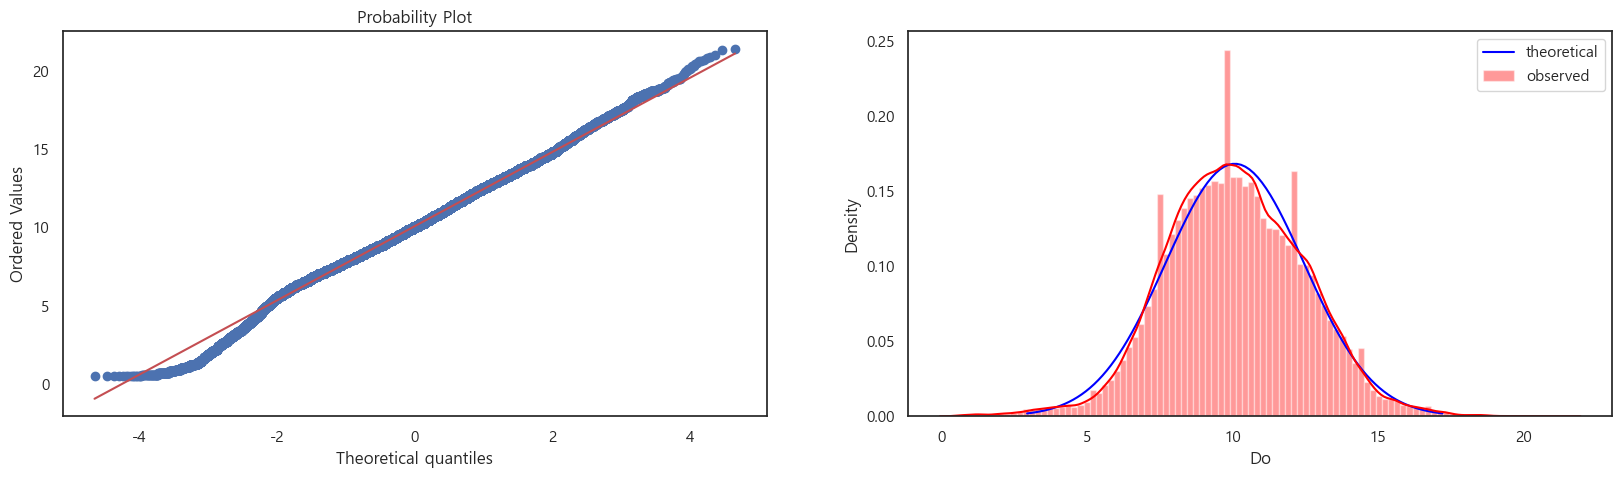

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


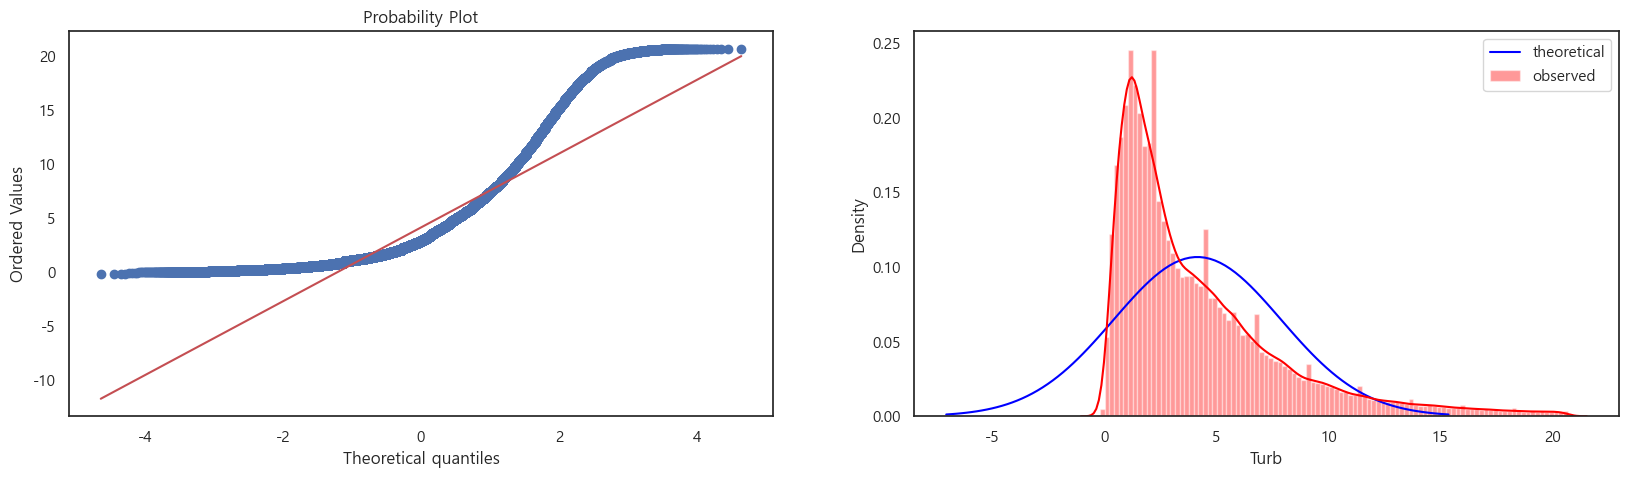

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


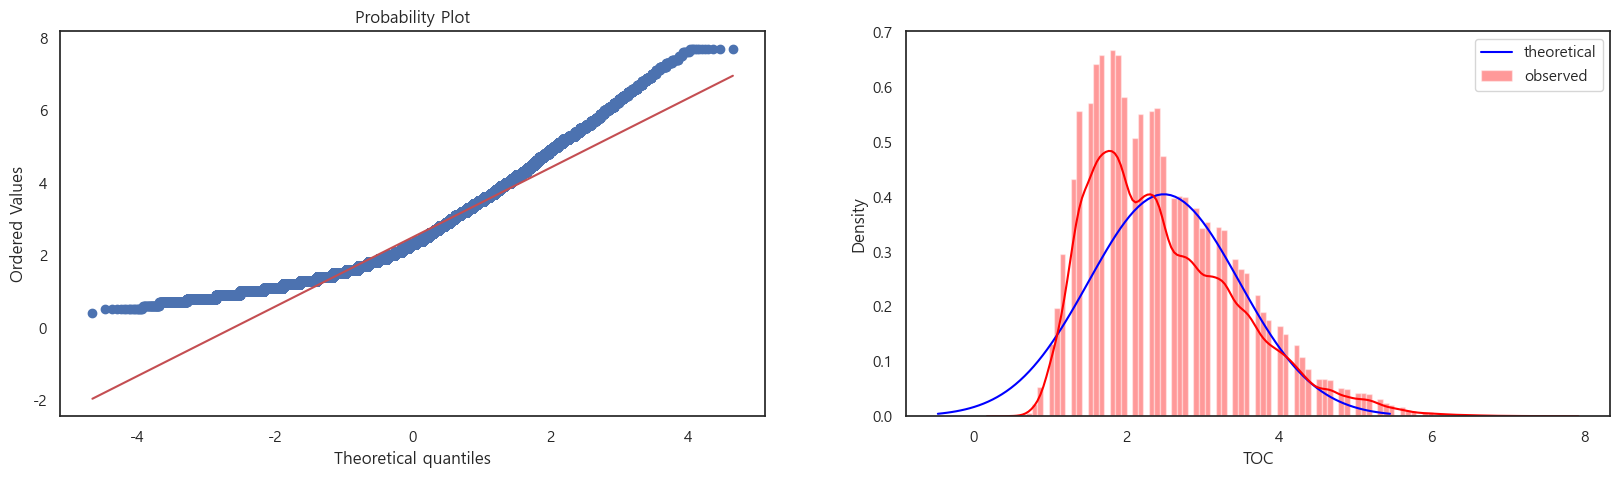

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


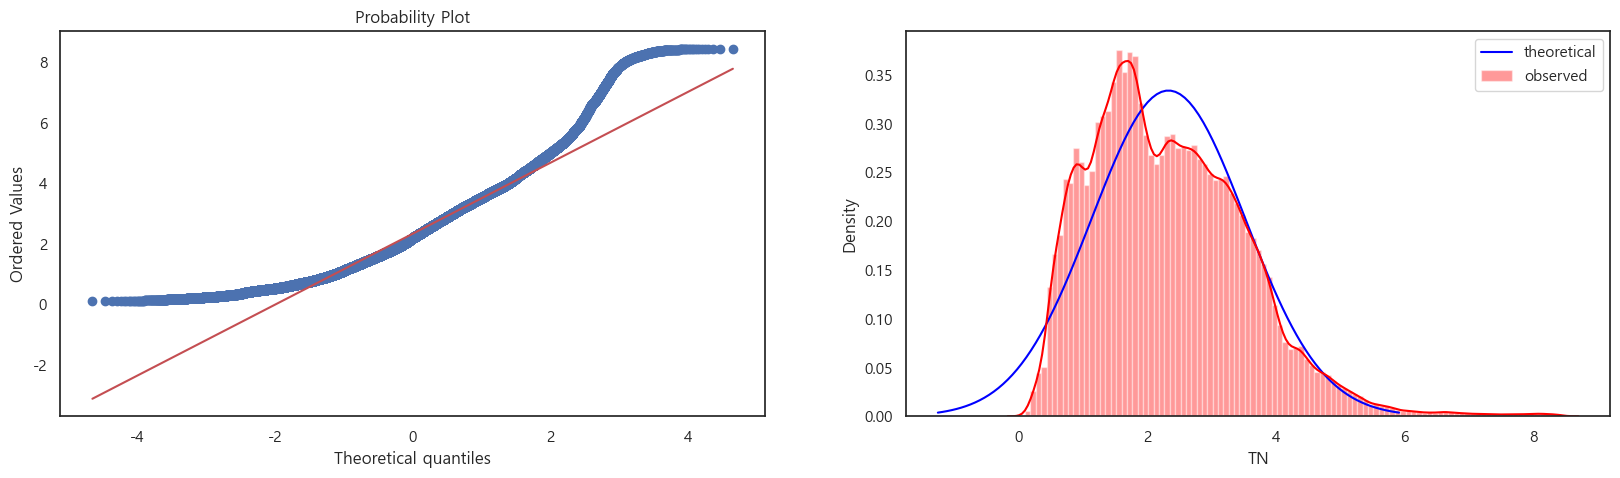

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\991635203.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


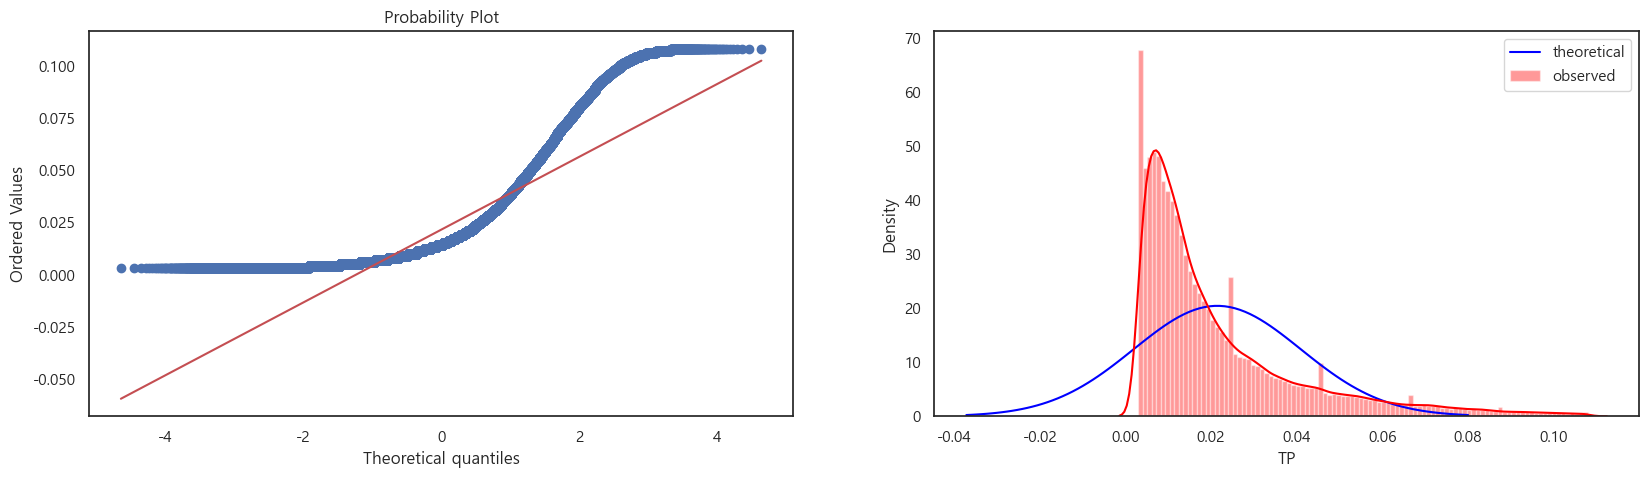

In [36]:
for k in df_temp.columns:
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    stats.probplot(df[k], dist=stats.norm, plot=ax1)

    mu = df[k].mean()
    variance = df[k].var()
    sigma = variance ** 0.5

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

    sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')
    ax2.legend()

    plt.show()

In [37]:
for k in df.columns:
    test_stat, p_val = stats.kstest(df[k], 'norm')
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))
    
# (Kolmogorov-Smirnov) kstest / shapiro

Test-statistics : 0.974, p-value : 0.000, skewness : 0.025
Test-statistics : 1.000, p-value : 0.000, skewness : 0.294
Test-statistics : 1.000, p-value : 0.000, skewness : 1.028
Test-statistics : 0.995, p-value : 0.000, skewness : 0.006
Test-statistics : 0.709, p-value : 0.000, skewness : 1.656
Test-statistics : 0.855, p-value : 0.000, skewness : 0.865
Test-statistics : 0.712, p-value : 0.000, skewness : 0.779
Test-statistics : 0.501, p-value : 0.000, skewness : 1.796


In [38]:
for k in df.columns:
    test_stat, p_val = stats.normaltest(df[k])
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))

Test-statistics : 310029.606, p-value : 0.000, skewness : 0.025
Test-statistics : 6816.994, p-value : 0.000, skewness : 0.294
Test-statistics : 64369.353, p-value : 0.000, skewness : 1.028
Test-statistics : 1283.796, p-value : 0.000, skewness : 0.006
Test-statistics : 123968.229, p-value : 0.000, skewness : 1.656
Test-statistics : 41891.170, p-value : 0.000, skewness : 0.865
Test-statistics : 40530.797, p-value : 0.000, skewness : 0.779
Test-statistics : 136076.520, p-value : 0.000, skewness : 1.796


# [Box-Cox]

In [39]:
print ("0 = : " , df[df == 0].count().sum())
print ("0 < : " , df[df_temp < 0].count().sum())
print ("0 > : " , df[df_temp > 0].count().sum())

0 = :  0
0 < :  8
0 > :  3259938


In [40]:
df_temp.count()

Temp    407545
pH      407545
EC      407545
Do      407545
Turb    407545
TOC     407545
TN      407545
TP      407545
dtype: int64

In [41]:
for k in df.columns:
    if k != 'Temp' and k != 'Do':
        df[k], lm = boxcox(df[k])
        print(k + ": {:.3f}".format(lm))

pH: -0.482
EC: 0.224


ValueError: Data must be positive.

In [42]:
for k in df.columns:
    test_stat, p_val = stats.kstest(df[k], 'norm')
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))
    
# (Kolmogorov-Smirnov) 검정

Test-statistics : 0.974, p-value : 0.000, skewness : 0.025
Test-statistics : 0.887, p-value : 0.000, skewness : 0.004
Test-statistics : 1.000, p-value : 0.000, skewness : -0.025
Test-statistics : 0.995, p-value : 0.000, skewness : 0.006
Test-statistics : 0.709, p-value : 0.000, skewness : 1.656
Test-statistics : 0.855, p-value : 0.000, skewness : 0.865
Test-statistics : 0.712, p-value : 0.000, skewness : 0.779
Test-statistics : 0.501, p-value : 0.000, skewness : 1.796


In [43]:
for k in df.columns:
    test_stat, p_val = stats.normaltest(df[k])
    print("Test-statistics : {:.3f}, p-value : {:.3f}, skewness : {:.3f}".format(test_stat, p_val, df[k].skew()))

Test-statistics : 310029.606, p-value : 0.000, skewness : 0.025
Test-statistics : 2194.707, p-value : 0.000, skewness : 0.004
Test-statistics : 10544.485, p-value : 0.000, skewness : -0.025
Test-statistics : 1283.796, p-value : 0.000, skewness : 0.006
Test-statistics : 123968.229, p-value : 0.000, skewness : 1.656
Test-statistics : 41891.170, p-value : 0.000, skewness : 0.865
Test-statistics : 40530.797, p-value : 0.000, skewness : 0.779
Test-statistics : 136076.520, p-value : 0.000, skewness : 1.796


C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


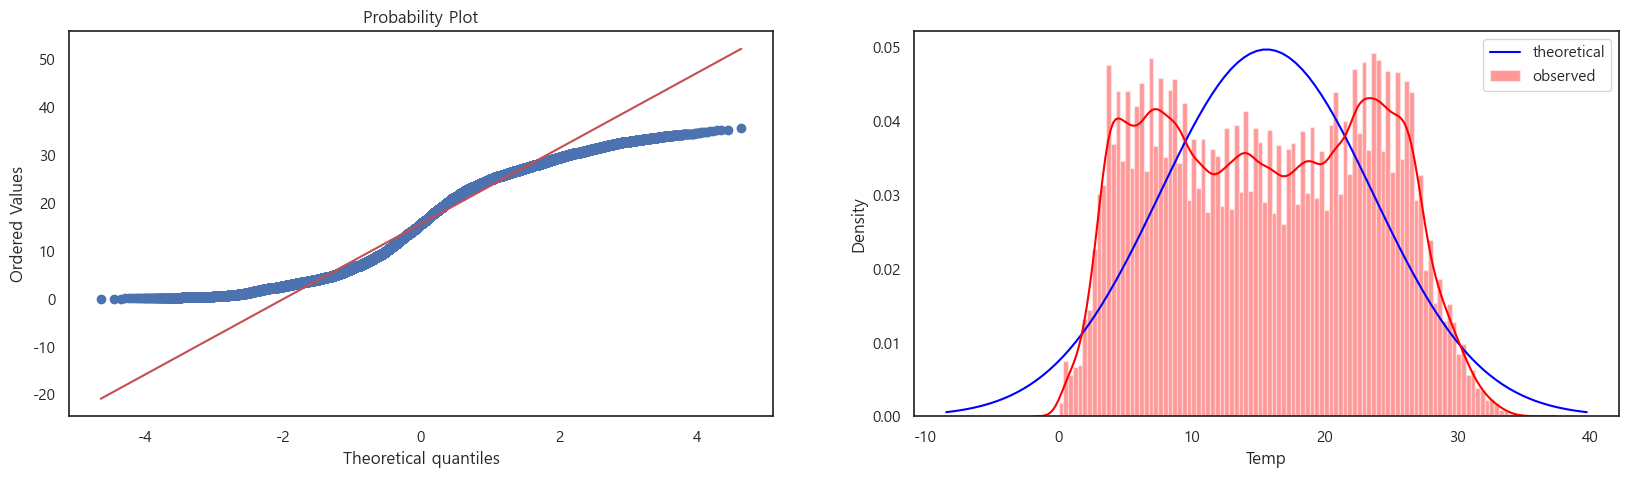

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


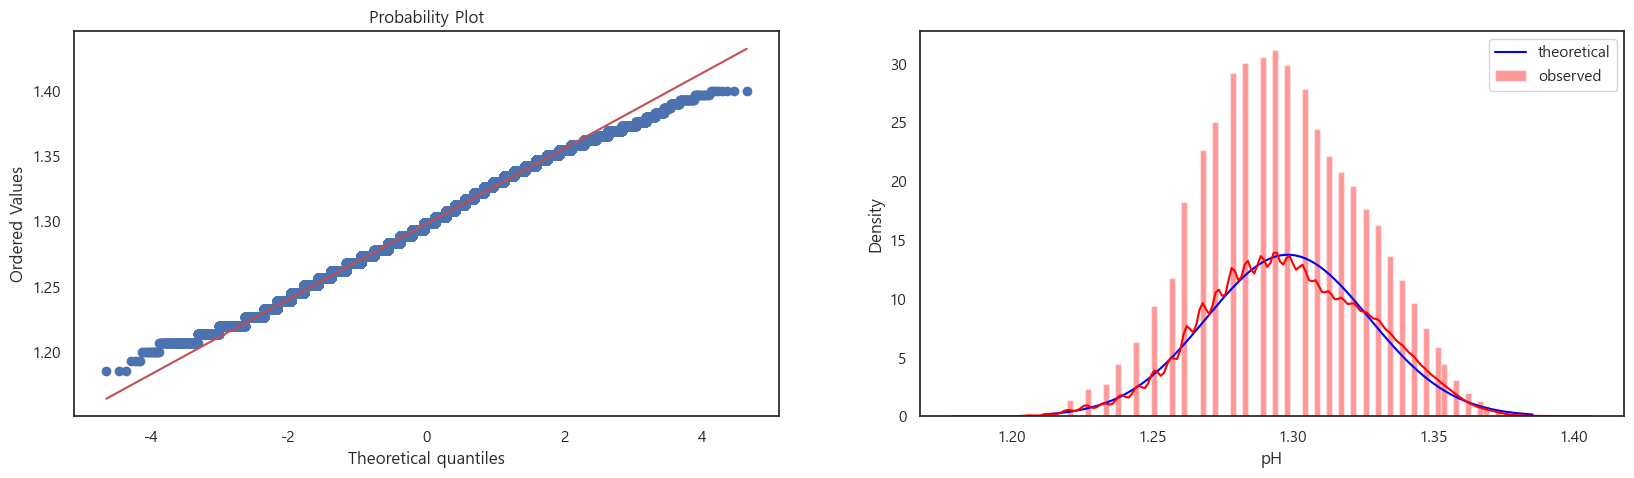

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


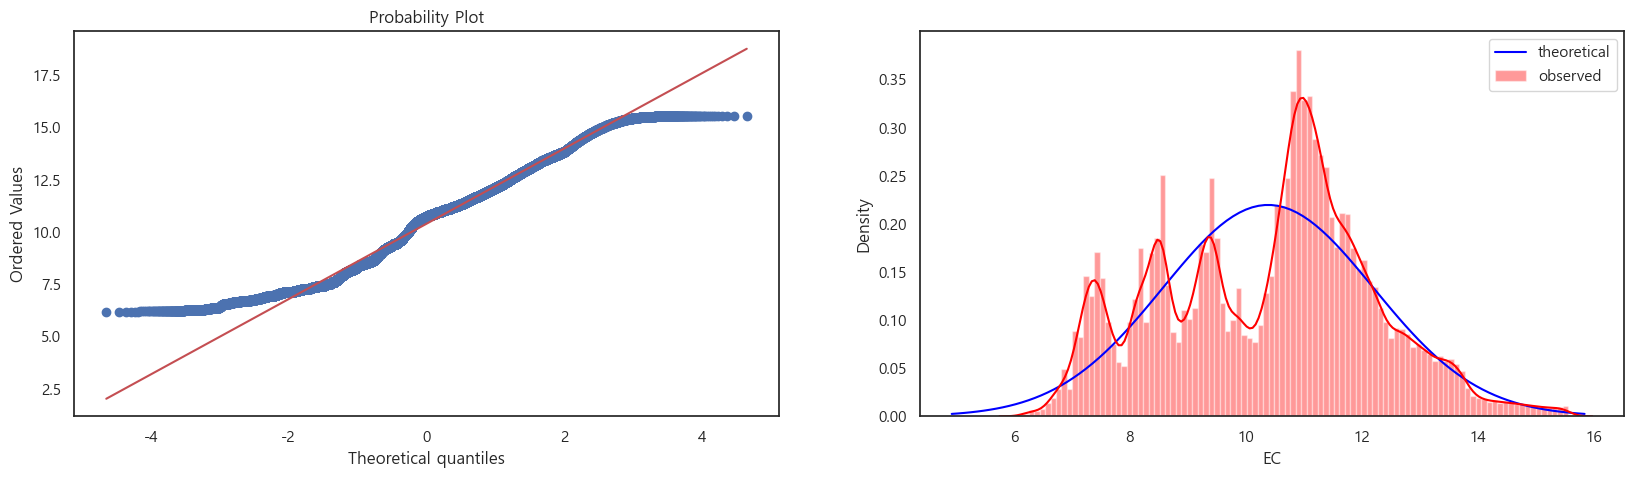

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


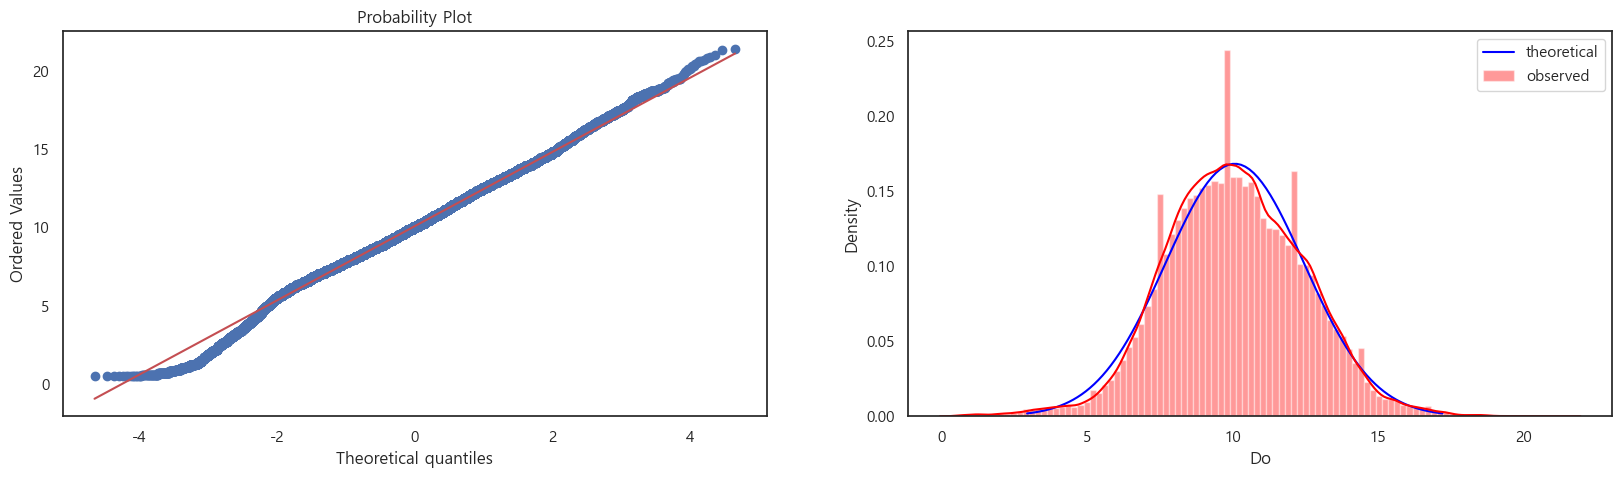

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


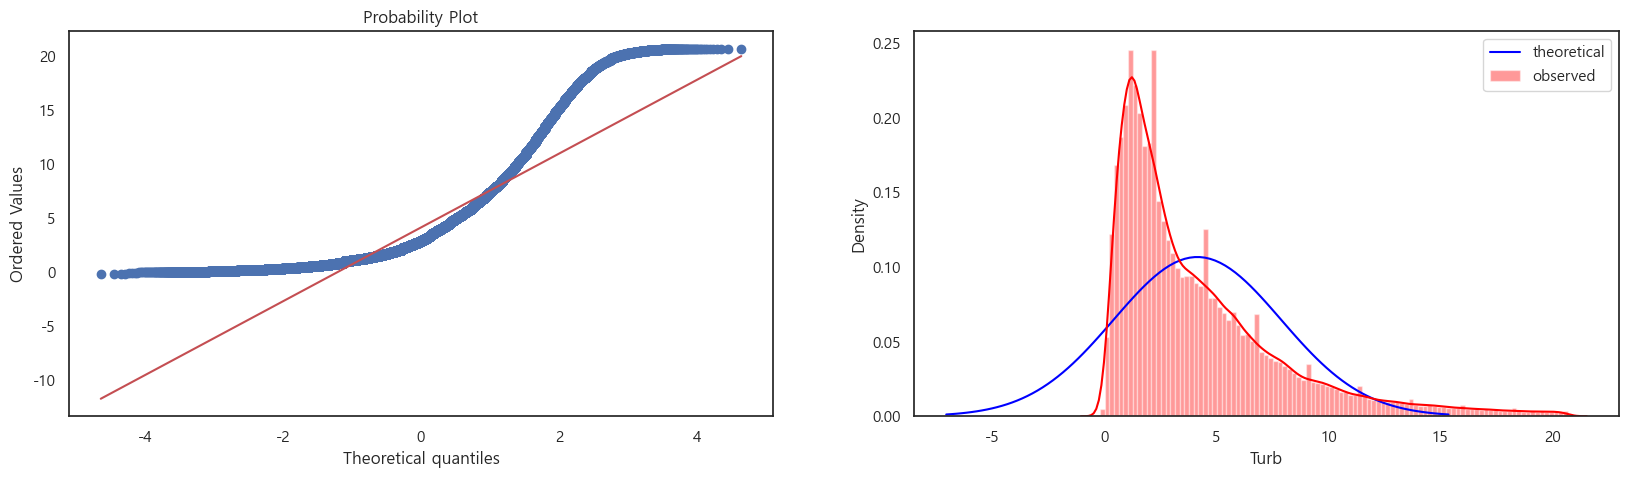

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


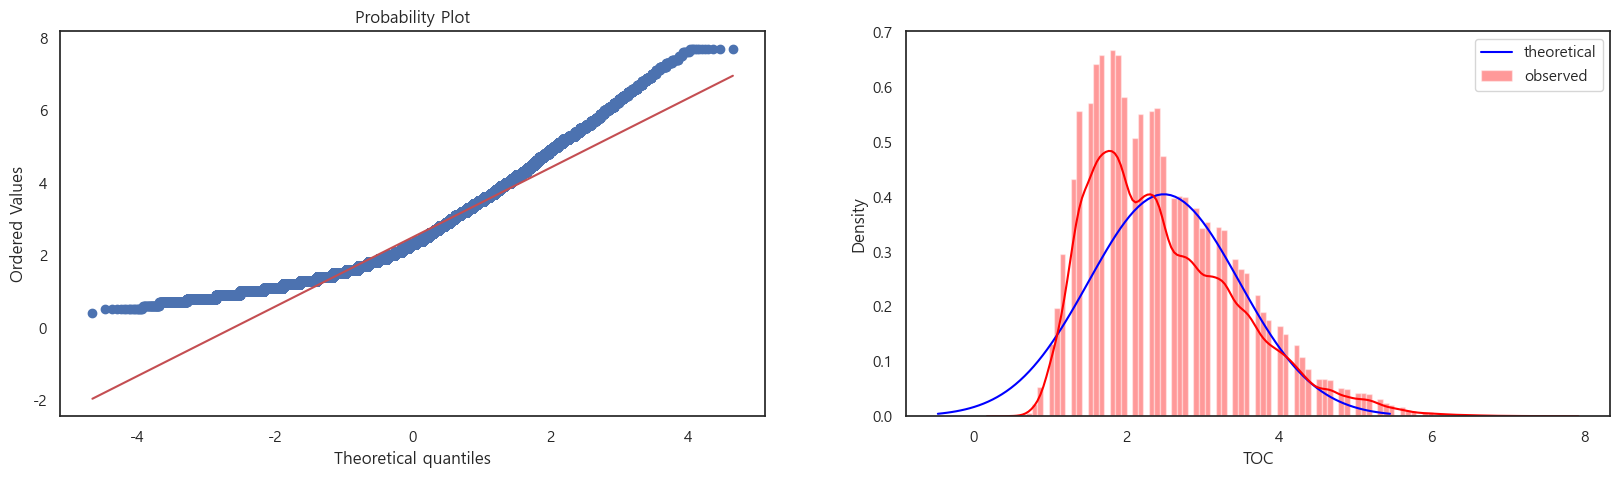

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


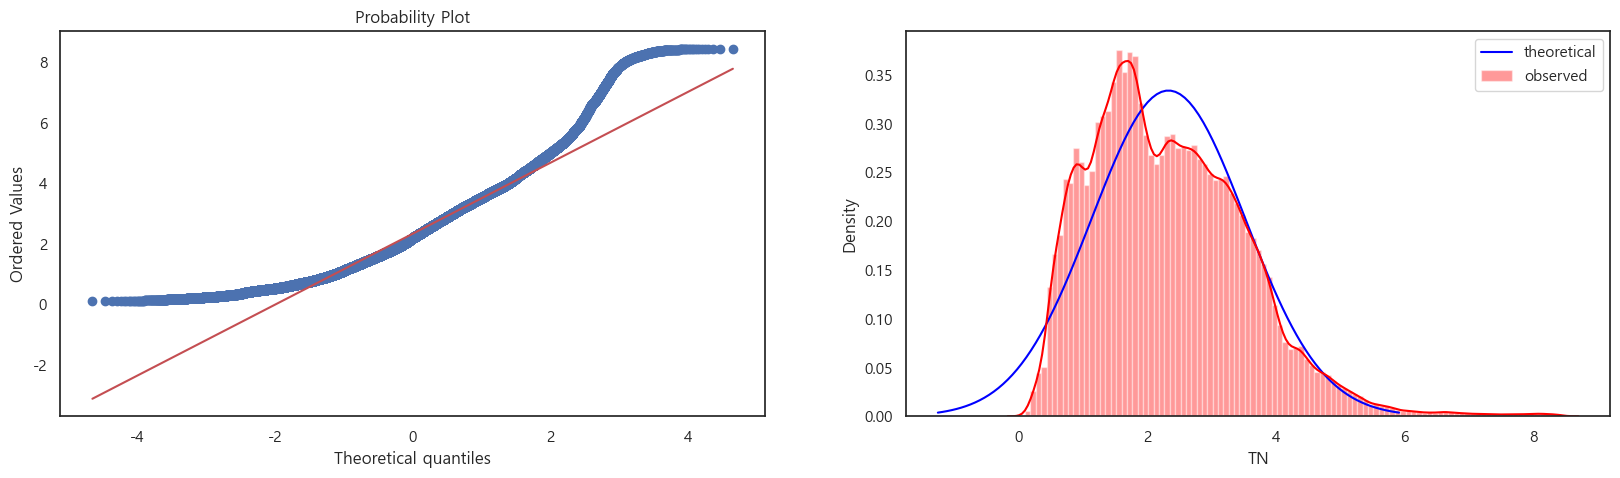

C:\Users\zzaru\AppData\Local\Temp\ipykernel_8112\1563661182.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')


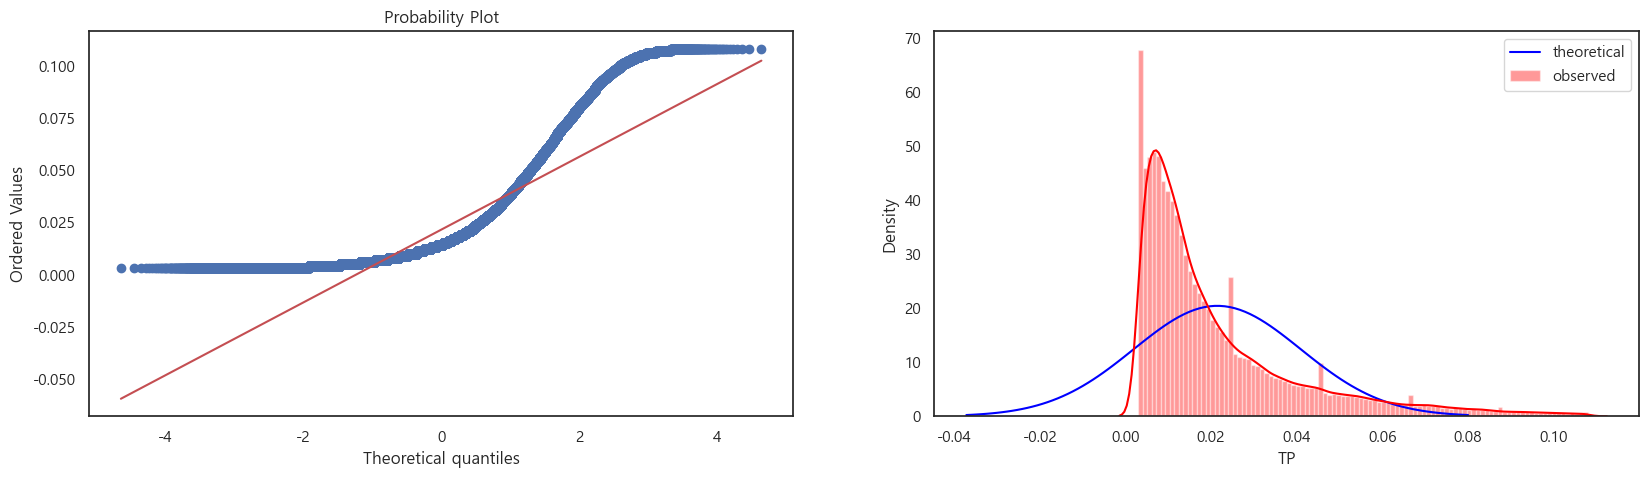

In [44]:
for k in df.columns:
    fig = plt.figure(figsize=(20,5))
    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    stats.probplot(df[k], dist=stats.norm, plot=ax1)

    mu = df[k].mean()
    variance = df[k].var()
    sigma = variance ** 0.5

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    ax2.plot(x, stats.norm.pdf(x, mu, sigma), color="blue", label='theoretical')

    sns.distplot(ax=ax2, a=df[k], bins=100, color="red", label='observed')
    ax2.legend()

    plt.show()

# [Scaler]

In [70]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, MaxAbsScaler, StandardScaler

from keras.models import Sequential
from keras.layers import Dense, PReLU, LeakyReLU, Dropout
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from keras import optimizers
import tensorflow as tf


# phương pháp lựa chọn feature, làm giảm số chiều đầu vào giúp cho việc training model
feature = ['Temp','pH','EC','Do','Turb']
label = ['TOC']
x_train, x_valid, y_train, y_valid = train_test_split(data[feature], data[label], test_size=0.2, random_state=1)

학습 데이터에 fit 한 설정을 그대로 test set에도 적용하는 것이다.

이때 주의할 점은 test set에는 fit이나 fit_transform 메서드를 절대 쓰면 안된다는거!

만약 test set에도 fit을 해버리면 sclaer가 기존에 학습 데이터에 fit한 기준을 다 무시하고 테스트 데이터에 새로운 mean, variance값을 얻으면서 테스트 데이터까지 학습해버린다. 테스트 데이터는 검증을 위해 남겨둔 셋이기 때문에 반드시 주의해야 한다.

추가로 train_test_split을 하기 전에 미리 전처리를 해주고 train, test분리를 해줘도 무방하다. ??? 일관성이 없는데... 무슨의미가..

아마도.. fit_transform 과 transform 의 차이를 확인해봐야 한다..

(The fit setting of the learning data is applied to the test set as it is.

Note that you should never use the fit or fit_transform method in the test set!

If the test set also fits, the sclar ignores all the criteria that fit the existing learning data and learns the test data by obtaining new mean and variance values in the test data. Be careful because the test data is set aside for verification.

In addition, before training_test_split, it is okay to pre-process it and separate the train and test. ??? It's not consistent... What's the point..

Maybe, we should check the difference between fit_transform and transform..)

In [71]:
scaler = RobustScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)

#scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()

###  ----------------특정 feature
#data[['pH']] = scaler.fit_transform(data[['pH']])
#data[['DO']] = scaler.fit_transform(data[['DO']])
#data[['SS']] = scaler.fit_transform(data[['SS']])
#data[['Temp']] = scaler.fit_transform(data[['Temp']])
#data[['BOD']] = scaler.fit_transform(data[['BOD']])

SGD부터 NAdam까지 모든 알고리즘을 살펴보았다. 각 알고리즘들은 이전 알고리즘들의 한계점을 보완해가며 발전해갔다.

먼저 SGD는 업데이트 한 번에 데이터 하나를 사용하여 Batch GD의 시간 문제를 해결했고,
Momentum은 SGD의 작은 gradient 때문에 작은 언덕이나 saddle point를 빠져나가지 못하는 것을 momentum을 도입하여 해결했다.
NAG는 다음 step의 gradient를 먼저 살펴보고 Momentum을 조절하여 minimum에 안정적으로 들어갈 수 있게 했으며,
Adagrad는 업데이트 빈도가 다른 파라미터에 대해서도 같은 비율로 업데이트하는 것을 이전 gradient들의 합을 기억함으로써 문제를 해결하였다.
RMSProp과 Adadelta는 Adagrad의 learning rate가 점점 소실되는 것을 gradient의 2차 모먼트를 통해 보완했고,
Adam은 RMSProp에 1차 모먼트를 도입하여 RMSProp과 Momentum을 합친 효과를 볼 수 있었다.
AdaMax는 Adam의 2차 모먼트에 있는 gradient의 norm을 max norm으로 바꿔주었고
마지막으로 NAdam은 ADAM에 NAG를 더해주어서 momentum을 보완해주었다.

(We looked at all algorithms from SGD to NAdam. Each algorithm has developed by complementing the limitations of previous algorithms.

First, SGD solved the time problem of Batch GD using one data at a time of update, and Momentum solved the inability to exit a small hill or saddle point due to SGD's small gradient by introducing Momentum. NAG first looked at the gradient of the next step and adjusted the Momentum to allow it to enter the minimum stably, and Adagrad solved the problem by remembering the sum of the previous gradients to update at the same rate for parameters with different update frequencies. RMSProp and Adela compensated for the gradual disappearance of Adagrad's learning rate through gradient's second-order moment, and Adam introduced the first-order moment into RMSProp to see the effect of combining RMSProp and Momentum. AdaMax changed the gradient norm in Adam's secondary moment to max norm, and finally, NAdam supplemented the momentum by adding NAG to ADAM).

In [72]:
#lrelu= lambda x: tf.keras.activations.relu(x, alpha=0.3)

Dratio=0.2

# 2. 모델 구성하기 (To configure a model)
model = Sequential()
model.add(Dense(256, input_dim=5, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(64, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(16, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(4, activation=PReLU(alpha_initializer="zeros")))
model.add(Dropout(Dratio))

model.add(Dense(1))

# 3. 모델 학습과정 설정하기 (Setting up a model course)
adam = optimizers.Nadam(lr=0.0005)
sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
rms = optimizers.RMSprop(lr=0.001)
model.compile(optimizer=adam, loss='mse', metrics=['mae'])

# 4. 모델 학습시키기 (To train a model)
hist = model.fit(x_train_scaled, y_train, epochs=500, batch_size=10000)

Epoch 1/500


C:\Users\zzaru\anaconda3\envs\new_tf\lib\site-packages\keras\optimizers\optimizer_v2\nadam.py:86: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\zzaru\anaconda3\envs\new_tf\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\zzaru\anaconda3\envs\new_tf\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


36/36 [==============================] - 3s 49ms/step - loss: 7.4593 - mae: 2.4723
Epoch 2/500
36/36 [==============================] - 1s 38ms/step - loss: 3.9156 - mae: 1.5711
Epoch 3/500
36/36 [==============================] - 2s 47ms/step - loss: 2.6639 - mae: 1.2555
Epoch 4/500
36/36 [==============================] - 2s 43ms/step - loss: 2.3369 - mae: 1.1706
Epoch 5/500
36/36 [==============================] - 2s 44ms/step - loss: 2.0998 - mae: 1.1039
Epoch 6/500
36/36 [==============================] - 2s 46ms/step - loss: 1.8984 - mae: 1.0457
Epoch 7/500
36/36 [==============================] - 2s 42ms/step - loss: 1.7447 - mae: 0.9963
Epoch 8/500
36/36 [==============================] - 2s 51ms/step - loss: 1.6062 - mae: 0.9512
Epoch 9/500
36/36 [==============================] - 2s 47ms/step - loss: 1.5078 - mae: 0.9224
Epoch 10/500
36/36 [==============================] - 2s 47ms/step - loss: 1.4458 - mae: 0.9006
Epoch 11/500
36/36 [==============================] - 2s 45ms

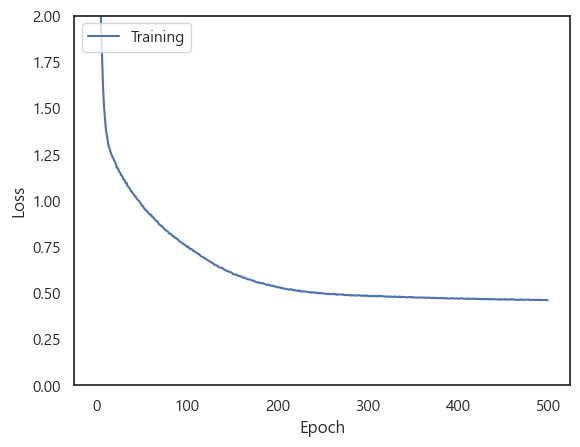

7351/7351 [==============================] - 6s 754us/step - loss: 0.3687 - mae: 0.4278
loss : [0.3686949908733368, 0.4277510344982147]


In [74]:
# 5. 학습과정 살펴보기 (Looking at the course of study)
%matplotlib inline
import matplotlib.pyplot as plt

# 6. 모델 평가하기 (Evaluating the Model)
plt.plot(hist.history['loss'])
plt.ylim(0.0, 2)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training'], loc='upper left')
plt.show()

loss = model.evaluate(x_valid_scaled, y_valid, batch_size=12)
print('loss : ' + str(loss))

In [75]:
##############################################################################################################
def adj_r2_score(y_true, y_pred, p=x_train_scaled.shape[1]):
    return 1-(1-r2_score(y_true, y_pred)) * (len(y_true)-1) / (len(y_true) - p - 1)

##############################################################################################################

from sklearn.metrics import explained_variance_score, mean_squared_error, mean_absolute_error, r2_score

pred = model.predict(x_valid_scaled)
pred = pd.DataFrame(pred, columns = label)

#print("R2_Train: ", r2_score(y_train, model.predict(x_valid_scaled)))
print("R2_Test:  ", r2_score(y_valid, pred))
print("ad_R2_Test:  ", adj_r2_score(y_valid, pred))

2757/2757 [==============================] - 2s 669us/step
R2_Test:   0.7271362650299855
ad_R2_Test:   0.7271207969150352


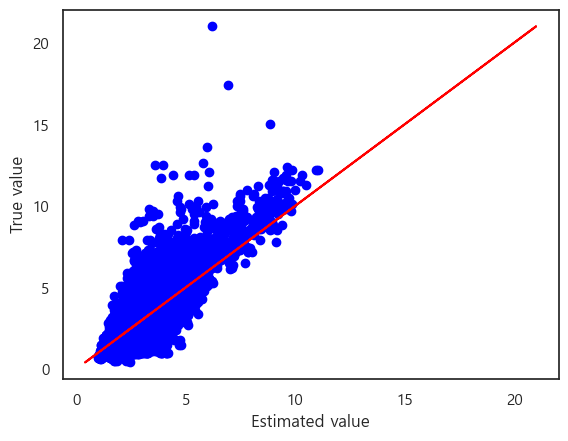

In [76]:
import matplotlib.pyplot as plt

plt.scatter (pred, y_valid, color = 'blue')
plt.plot (y_valid, y_valid, color = 'red')
plt.xlabel('Estimated value')
plt.ylabel('True value')
plt.show()